In [ ]:
#columnas_seleccionadas = [
   # 'action_taken2', 'purchaser_type', 'preapproval',
    #'loan_type', 'loan_purpose', 'lien_status','reverse_mortgage','open_end_line_of_credit', 'business_or_commercial_purpose' 'loan_amount', 'hoepa_status',
    #'occupancy_type', 'applicant_credit_score_type','combined_loan_to_value_ratio', 'property_value ','occupancy_type ','manufactured_home_secured_proper',
    #'applicant_age', 'hoepa_status ', 'loan_term ','manufactured_home_land_property', 'multifamily_affordable_units','income ','applicant_credit_score_type'
    #'conforming_loan_limit', 'derived_loan_product_type', 'applicant_sex '

# CARGA INFORMACION

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Librerias
import os
from pandas import read_csv
%matplotlib inline

import numpy as np
import pandas as pd
#graficas
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [ ]:
import pandas as pd

# Reemplaza la ruta con la ubicación de tu archivo Stata (.dta)
file_path = "/content/drive/MyDrive/Proyecto Grado/HDMA/Version Final/LAR_18_19_Muestra.dta"

# Cargar el archivo Stata en un DataFrame
data = pd.read_stata(file_path)


In [ ]:
# Información sobre tipos de datos y valores nulos
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 61 columns):
 #   Column                            Non-Null Count    Dtype   
---  ------                            --------------    -----   
 0   activity_year                     1000000 non-null  int16   
 1   lei                               1000000 non-null  object  
 2   state_code                        1000000 non-null  object  
 3   county_code                       1000000 non-null  object  
 4   action_taken                      1000000 non-null  category
 5   purchaser_type                    1000000 non-null  category
 6   preapproval                       1000000 non-null  int8    
 7   loan_type                         1000000 non-null  category
 8   loan_purpose                      1000000 non-null  category
 9   lien_status                       1000000 non-null  int8    
 10  reverse_mortgage                  973978 non-null   float64 
 11  open_end_line_of_credit  

In [ ]:
categorias_columna1 = data['applicant_sex'].unique()
categorias_columna2 = data['applicant_race_1'].unique()
categorias_columna3 = data['applicant_ethnicity_1'].unique()
categorias_columna4 = data['applicant_age_above_62'].unique()

print("Categorías únicas en applicant_sex :", categorias_columna1)
print("Categorías únicas en applicant_race_1:", categorias_columna2)
print("Categorías únicas en applicant_ethnicity_1:", categorias_columna3)
print("Categorías únicas en applicant_age_above_62:", categorias_columna4)


Categorías únicas en applicant_sex : ['mujer', 'hombre', 'selecciono ambas opciones']
Categories (3, object): ['hombre' < 'mujer' < 'selecciono ambas opciones']
Categorías únicas en applicant_race_1: ['negro/afroamericano', 'blanco', 'sin info', 'asiatico', 'nativo americano/alaska', ..., 'koreano', 'guameno o chamorro', 'japones', 'samoan', 'hawaiano']
Length: 18
Categories (18, object): ['nativo americano/alaska' < 'asiatico' < 'negro/afroamericano' <
                          'hawaiano/isleno del pacifico' ... 'hawaiano' < 'guameno o chamorro' < 'samoan' <
                          'otro isleno del pacifico']
Categorías únicas en applicant_ethnicity_1: ['no hispano/latino', 'hispano/latino', 'sin info', 'mexicano', 'otro hispano/latino', 'cubano', 'puertorriqueno', NaN, 'no aplica']
Categories (8, object): ['hispano/latino' < 'no hispano/latino' < 'sin info' < 'no aplica' < 'mexicano' <
                         'puertorriqueno' < 'cubano' < 'otro hispano/latino']
Categorías únicas e

In [ ]:
# Mostrar los datos originales de una columna específica
columna_original = data['action_taken2']
print(columna_original)


0                negado
1              aprobado
2              aprobado
3              aprobado
4         no finalizado
              ...      
999995         aprobado
999996         aprobado
999997         aprobado
999998         aprobado
999999         aprobado
Name: action_taken2, Length: 1000000, dtype: category
Categories (3, object): ['aprobado' < 'negado' < 'no finalizado']


# PREPARACION DATA SET PARA FASE MODELOS

Se abordan los siguientes pasos:

Preparar el conjunto de datos
Dividir en el entrenamiento y la prueba
Transformar/Codificar las etiquetas de las variables
PExplorar diferents modelos de clasificacion
Compara el desempeño de todos los modelos.
Seleccionar un  modelo ganador y ajuste los hiperparámetros para obtener una mayor precisión.
Evaluación detallada de resultado con una matriz de confusión y diferentes medidas.
Características más importantes para predecir la calificación.

In [ ]:
# Eliminación de variables que tengan valores nulos
#df1 = data.dropna(axis=1)

# Eliminación de tres columnas adicionales específicas
columnas_adicionales = ['lei', 'state_code', 'county_code', 'activity_year']
#df1 = df1.drop(columnas_adicionales, axis=1)


In [ ]:
# Guardar la correspondencia de clases para 'action_taken2'
correspondencia_original_action_taken2 = dict(zip(data['action_taken2'].unique(), data['action_taken2'].unique()))
print("Correspondencia de clases original para 'action_taken2':")
print(correspondencia_original_action_taken2)


Correspondencia de clases original para 'action_taken2':
{'negado': 'negado', 'aprobado': 'aprobado', 'no finalizado': 'no finalizado'}


In [ ]:
# Convertir valores de action_taken2 a minúsculas
data['action_taken2'] = data['action_taken2'].str.lower()

# Mapeo de los valores de action_taken2 a los valores correspondientes en action_taken3
mapping = {
    'aprobado': 'Otorgado',
    'negado': 'No Otorgado',
    'no finalizado': 'No Otorgado'
}

# Crear la nueva columna action_taken3 basada en los valores de action_taken2
data['action_taken3'] = data['action_taken2'].replace(mapping)

In [ ]:
data

,activity_year,lei,state_code,county_code,action_taken,purchaser_type,preapproval,loan_type,loan_purpose,lien_status,...,action_taken3,protegido_edad_antes_conversion,no_protegido_edad_antes_conversion,protegido_mujer_antes_conversion,no_protegido_hombre_antes_conversion,protegido_raza_antes_conversion,no_protegido_raza_antes_conversion,poblacion_protegida,poblacion_protegida_nueva,action_taken3_encoded
0,2019,2549009IIR21WKPEE762,AL,01073,application denied,not applicable,0,conventional,refinancing,1,...,No Otorgado,0,1,1,0,1,0,1.0,1.0,0
1,2019,549300EWYXV06QXJH078,MI,26145,loan originated,not applicable,0,conventional,cash-out refinancing,1,...,Otorgado,0,1,0,1,0,1,0.0,0.0,1
2,2018,549300TKFZR4QBNE5D40,KY,21065,loan originated,"credit union, mortgage company, finance company",0,federal housing administration insured,cash-out refinancing,1,...,Otorgado,0,1,0,1,0,1,0.0,0.0,1
3,2019,549300YOESI1GLKRL151,VA,51760,loan originated,private securitizer,0,conventional,home purchase,1,...,Otorgado,0,1,0,1,0,1,0.0,0.0,1
4,2019,254900R7YE9RG1CL6U13,AL,01089,application withdrawn by applicant,not applicable,0,conventional,refinancing,1,...,No Otorgado,1,0,0,1,0,1,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2019,KB1H1DSPRFMYMCUFXT09,CA,06037,loan originated,not applicable,0,conventional,home improvement,0,...,Otorgado,0,1,1,0,0,0,1.0,1.0,1
999996,2019,549300SJTLYB6ZWKPR88,NC,37023,loan originated,"credit union, mortgage company, finance company",0,conventional,home purchase,1,...,Otorgado,0,1,0,1,0,1,0.0,0.0,1
999997,2018,549300L9MOPDT0NKE883,MO,29037,loan originated,other type of purchaser,0,conventional,cash-out refinancing,1,...,Otorgado,0,1,1,0,0,1,1.0,1.0,1
999998,2019,5493001GDRY0EL7VG372,NC,37183,loan originated,not applicable,0,federal housing administration insured,home purchase,1,...,Otorgado,0,1,1,0,0,1,1.0,1.0,1


In [ ]:
# Mostrar los datos originales de una columna específica
columna_original = data['action_taken3']
print(columna_original)

0         No Otorgado
1            Otorgado
2            Otorgado
3            Otorgado
4         No Otorgado
             ...     
999995       Otorgado
999996       Otorgado
999997       Otorgado
999998       Otorgado
999999       Otorgado
Name: action_taken3, Length: 1000000, dtype: object


In [ ]:
# Convertir valores a cadenas y guardar los originales en nuevas columnas
columns_to_check = ['protegido_edad', 'no_protegido_edad', 'protegido_mujer', 'no_protegido_hombre', 'protegido_raza', 'no_protegido_raza']

for column in columns_to_check:
    # Crear una nueva columna con el nombre original + '_antes_conversion'
    data[column + '_antes_conversion'] = data[column]
    # Convertir los valores a numéricos
    data[column] = pd.to_numeric(data[column], errors='coerce')

import numpy as np

# Crear la nueva columna 'poblacion_protegida' basada en las condiciones
data['poblacion_protegida'] = np.where(
    (data['protegido_edad'] == 1) |
    (data['protegido_mujer'] == 1) |
    (data['protegido_raza'] == 1),
    1,  # Si alguna de las condiciones se cumple, asigna 1
    np.where(
        (data['no_protegido_edad'] == 1) |
        (data['no_protegido_hombre'] == 1) |
        (data['no_protegido_raza'] == 1),
        0,  # Si alguna de las condiciones se cumple, asigna 0
        np.nan  # Si ninguna de las condiciones se cumple, asigna NaN por defecto
    )
)

# Crear una nueva columna 'poblacion_protegida_nueva' basada en las condiciones
data['poblacion_protegida_nueva'] = np.where(
    (data['protegido_edad'] == 1) |
    (data['protegido_mujer'] == 1) |
    (data['protegido_raza'] == 1),
    1,  # Si alguna de las condiciones se cumple, asigna 1
    np.where(
        (data['no_protegido_edad'] == 1) |
        (data['no_protegido_hombre'] == 1) |
        (data['no_protegido_raza'] == 1),
        0,  # Si alguna de las condiciones se cumple, asigna 0
        np.nan  # Si ninguna de las condiciones se cumple, asigna NaN por defecto
    )
)


In [ ]:
# Información sobre tipos de datos y valores nulos
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 70 columns):
 #   Column                                Non-Null Count    Dtype   
---  ------                                --------------    -----   
 0   activity_year                         1000000 non-null  int16   
 1   lei                                   1000000 non-null  object  
 2   state_code                            1000000 non-null  object  
 3   county_code                           1000000 non-null  object  
 4   action_taken                          1000000 non-null  category
 5   purchaser_type                        1000000 non-null  category
 6   preapproval                           1000000 non-null  int8    
 7   loan_type                             1000000 non-null  category
 8   loan_purpose                          1000000 non-null  category
 9   lien_status                           1000000 non-null  int8    
 10  reverse_mortgage                      97397

# CREACION DE DATA SET PARA MODELOS

In [ ]:
# Crear un nuevo DataFrame con solo las columnas seleccionadas
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


# Lista de columnas seleccionadas
columnas_seleccionadas = ['action_taken3', 'income', 'applicant_sex', 'loan_amount', 'loan_purpose', 'loan_type', 'debt_to_income_ratio','combined_loan_to_value_ratio', 'applicant_age']
df = data[columnas_seleccionadas].copy()


# Usar LabelEncoder para transformar la columna 'action_taken2'

label_encoder_action_taken3 = LabelEncoder()
df['action_taken3'] = label_encoder_action_taken3.fit_transform(df['action_taken3'])

# Convertir variables categóricas a numéricas y mapear clases de 'action_taken2' a números
label_encoder = LabelEncoder()
#df['purchaser_type'] = label_encoder.fit_transform(df['purchaser_type'])
#df['preapproval'] = label_encoder.fit_transform(df['preapproval'])
df['loan_type'] = label_encoder.fit_transform(df['loan_type'])
df['loan_purpose'] = label_encoder.fit_transform(df['loan_purpose'])
#df['lien_status'] = label_encoder.fit_transform(df['lien_status'])
#f['hoepa_status'] = label_encoder.fit_transform(df['hoepa_status'])
#df['occupancy_type'] = label_encoder.fit_transform(df['occupancy_type'])
#df['applicant_credit_score_type'] = label_encoder.fit_transform(df['applicant_credit_score_type'])
#df['manufactured_home_land_property_'] = label_encoder.fit_transform(df['manufactured_home_land_property_'])
df['applicant_sex'] = label_encoder.fit_transform(df['applicant_sex'])
#df['conforming_loan_limit'] = label_encoder.fit_transform(df['conforming_loan_limit'])
#df['derived_loan_product_type'] = label_encoder.fit_transform(df['derived_loan_product_type'])
#df['applicant_race_1'] = label_encoder.fit_transform(df['applicant_race_1'])
#df['applicant_ethnicity_1'] = label_encoder.fit_transform(df['applicant_ethnicity_1'])
df['debt_to_income_ratio'] = label_encoder.fit_transform(df['debt_to_income_ratio'])
df['applicant_age'] = label_encoder.fit_transform(df['applicant_age'])

# Definir la función para mapear 'action_taken2' a 'aprobado'
def map_approval(action_taken3):
    # Define aquí tus criterios para determinar si un préstamo fue aprobado o no
    # Por ejemplo, si action_taken es 1, considera que el préstamo fue aprobado (1); de lo contrario, no aprobado (0)
    if action_taken3 == 1:
        return 1
    else:
        return 0

# Aplicar la función para crear la columna 'aprobado'
#df['otorgado'] = df['action_taken3'].apply(map_approval)

# Dividir el conjunto de datos en características (X) y etiquetas (y)
#X = df.drop(['otorgado', 'action_taken3'], axis=1)  # Excluir 'aprobado' y 'action_taken2' de las características
#y = df['otorgado']  # Usar 'aprobado' como variable de respuesta

# Dividir el conjunto de datos en características (X) y etiquetas (y)
X = df.drop(['action_taken3'], axis=1)  # Excluir 'action_taken3' de las características
y = df['action_taken3']  # Usar 'action_taken3' como variable de respuesta


# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Resto del código...
# Definir las transformaciones para las variables numéricas y categóricas
numeric_features = ['loan_amount',
                    'income','combined_loan_to_value_ratio']
categorical_features = ['applicant_sex','loan_purpose', 'loan_type','debt_to_income_ratio','applicant_age']

# Crear el transformador para datos numéricos
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputación de valores faltantes con la media
    ('scaler', StandardScaler())  # Estandarización de las variables
])

# Crear el transformador para datos categóricos
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputación de valores faltantes con la moda
    ('encoder', OneHotEncoder(drop='first'))  # Codificación one-hot
])

# Combinar transformadores
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [ ]:
# Información sobre tipos de datos y valores nulos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   action_taken3                 1000000 non-null  int64  
 1   income                        957551 non-null   float64
 2   applicant_sex                 1000000 non-null  int64  
 3   loan_amount                   1000000 non-null  int32  
 4   loan_purpose                  1000000 non-null  int64  
 5   loan_type                     1000000 non-null  int64  
 6   debt_to_income_ratio          1000000 non-null  int64  
 7   combined_loan_to_value_ratio  701585 non-null   float64
 8   applicant_age                 1000000 non-null  int64  
dtypes: float64(2), int32(1), int64(6)
memory usage: 64.8 MB
None


# ENTRENAMIENTO MODELOS

# lGBM Model

In [ ]:

from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Instanciar y entrenar el modelo LGBMClassifier
lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_lgbm = lgbm_model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)
classification_rep_lgbm = classification_report(y_test, y_pred_lgbm)

# Imprimir métricas de rendimiento para LGBMClassifier
print(f'LGBMClassifier Accuracy: {accuracy_lgbm}')
print(f'LGBMClassifier Confusion Matrix:\n{conf_matrix_lgbm}')
print(f'LGBMClassifier Classification Report:\n{classification_rep_lgbm}')


[LightGBM] [Info] Number of positive: 523370, number of negative: 276630
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.080920 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 788
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.654212 -> initscore=0.637608
[LightGBM] [Info] Start training from score 0.637608
LGBMClassifier Accuracy: 0.807315
LGBMClassifier Confusion Matrix:
[[ 47588  21468]
 [ 17069 113875]]
LGBMClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.69      0.71     69056
           1       0.84      0.87      0.86    130944

    accuracy                           0.81    200000
   macro avg       0.79      0.78      0.78    200000
weighted avg       0.80      0.

Precisión, recall y F1 GTB Mejor modelo

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_lgbm, target_names=['No Aprobado', 'Aprobado']))


              precision    recall  f1-score   support

 No Aprobado       0.74      0.69      0.71     69056
    Aprobado       0.84      0.87      0.86    130944

    accuracy                           0.81    200000
   macro avg       0.79      0.78      0.78    200000
weighted avg       0.80      0.81      0.81    200000



#VARIABLES MAS IMPORTANTES Del MODELO LGBM

INTERPRETABILIDAD

Caracteristicas mas importantes en el XGBOOST: El largo de las barras indica la frecuencia de uso de cada característica para realizar divisiones, y valores más altos indican una mayor importancia según el criterio de peso. La importancia de una característica basada en 'weight' se calcula contando la frecuencia con la que se utiliza la característica para dividir los nodos a lo largo de todos los árboles en el modelo. Cuanto más frecuentemente se utiliza una característica para realizar divisiones, mayor será su importancia en términos de peso.


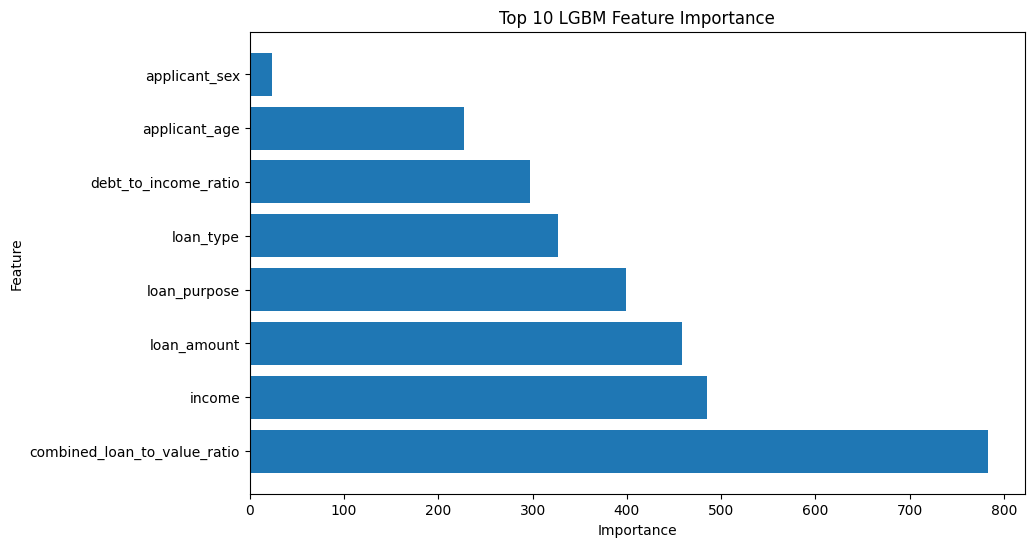

<Figure size 1000x600 with 0 Axes>

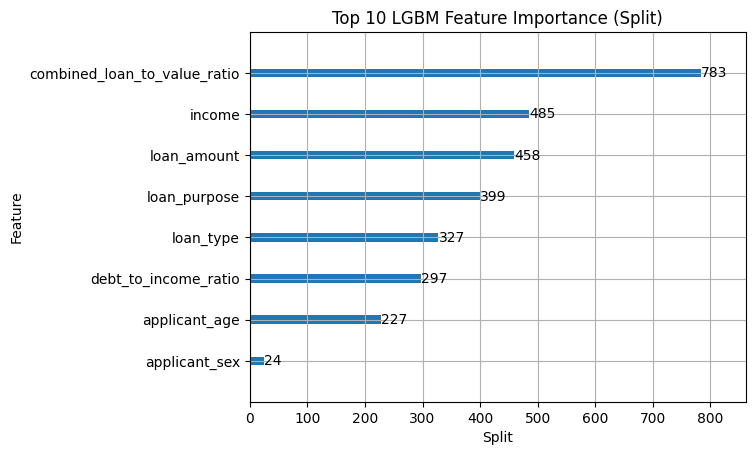

<Figure size 1000x600 with 0 Axes>

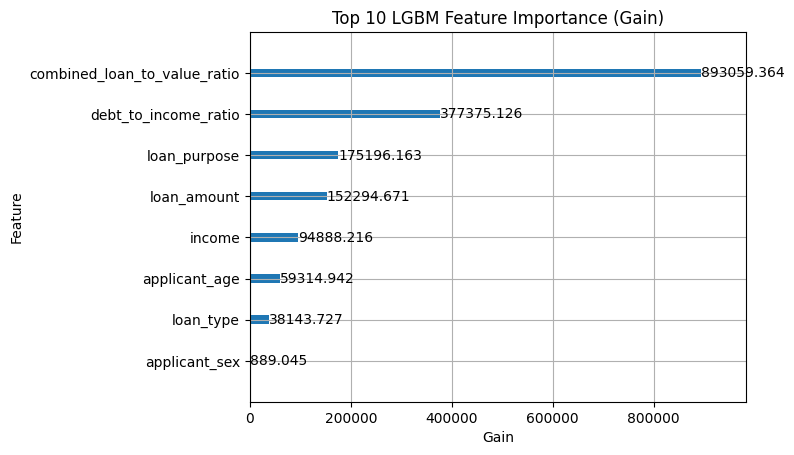

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance
import lightgbm as lgb

# Obtener la importancia de las variables
importances = lgbm_model.feature_importances_

# Obtener los nombres de las variables (columnas)
feature_names = X_train.columns

# Crear un DataFrame para visualizar las importancias
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Ordenar el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Seleccionar las 10 variables más importantes
top_10_features = feature_importance_df.head(10)

# Visualizar las importancias de las 10 variables más importantes
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 LGBM Feature Importance')
plt.show()

# También puedes usar la función plot_importance de XGBoost para crear un gráfico de barras
# Visualizar las importancias de las 10 variables más importantes con LightGBM
plt.figure(figsize=(10, 6))
lgb.plot_importance(lgbm_model, importance_type='split', xlabel='Split', ylabel='Feature', title='Top 10 LGBM Feature Importance (Split)')
plt.show()

plt.figure(figsize=(10, 6))
lgb.plot_importance(lgbm_model, importance_type='gain', xlabel='Gain', ylabel='Feature', title='Top 10 LGBM Feature Importance (Gain)')
plt.show()



Ganancia (Gain): Esta métrica de importancia de características mide cuánto cada característica contribuye a mejorar la precisión del modelo. La ganancia se calcula utilizando la mejora (gain) que proporciona cada característica al dividir los datos durante el entrenamiento del árbol. Cuanto mayor sea la ganancia, más importante se considera la característica para el modelo.

División (Split): Esta métrica de importancia de características mide la cantidad de veces que una característica se utiliza para dividir los datos durante la construcción del árbol. Es decir, cuántas veces una característica aparece en los puntos de división del árbol. Una característica con un alto número de divisiones puede considerarse importante porque influye en la estructura del árbol.

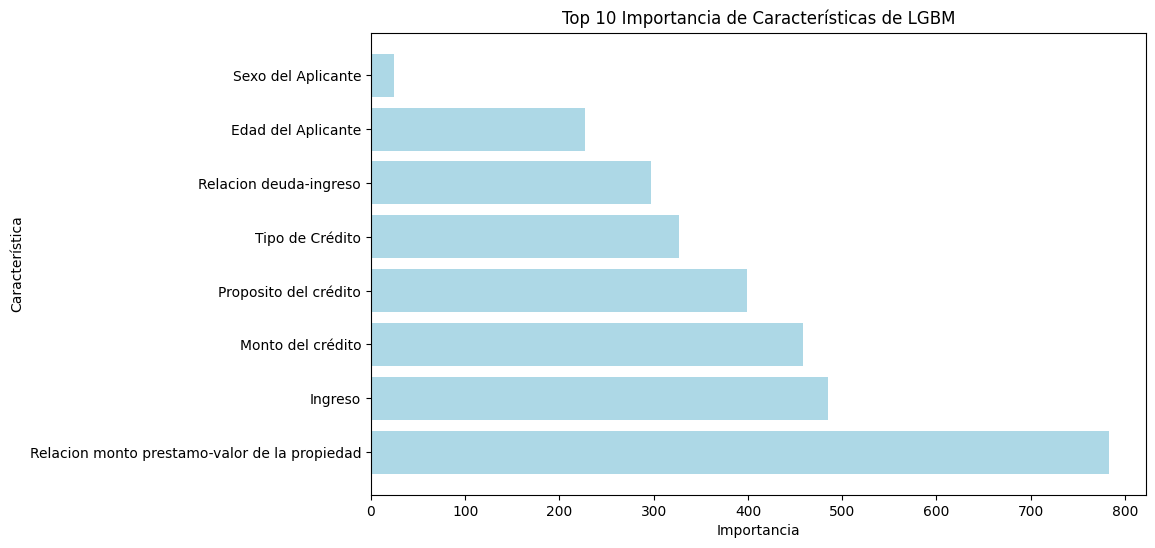

In [ ]:
import matplotlib.pyplot as plt
import lightgbm as lgb

# Obtener la importancia de las variables
importances = lgbm_model.feature_importances_

# Obtener los nombres de las variables (columnas)
feature_names = X_train.columns

# Diccionario de traducción de nombres de variables
traduccion_variables = {
    'combined_loan_to_value_ratio': 'Relacion monto prestamo-valor de la propiedad',
    'debt_to_income_ratio': 'Relacion deuda-ingreso',
    'loan_purpose': 'Proposito del crédito',
    'loan_amount': 'Monto del crédito',
    'income': 'Ingreso',
    'applicant_age': 'Edad del Aplicante',
    'loan_type': 'Tipo de Crédito',
    'applicant_sex': 'Sexo del Aplicante',
    # Añade más traducciones según sea necesario
}

# Traducción de los nombres de las variables
feature_names_es = [traduccion_variables.get(var, var) for var in feature_names]

# Crear un DataFrame para visualizar las importancias
feature_importance_df = pd.DataFrame({'Feature': feature_names_es, 'Importance': importances})

# Ordenar el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Seleccionar las 10 variables más importantes
top_10_features = feature_importance_df.head(10)

# Visualizar las importancias de las 10 variables más importantes con LightGBM
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='lightblue')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Top 10 Importancia de Características de LGBM')
plt.show()



In [ ]:
# Obtener la importancia de las variables
importances = lgbm_model.feature_importances_

# Obtener los nombres de las variables (columnas)
feature_names = X_train.columns

# Crear un DataFrame para visualizar las importancias
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Extraer solo el nombre base de las variables
feature_importance_df['Feature'] = feature_importance_df['Feature'].apply(lambda x: x.split('_')[0])

# Agrupar por nombre de variable y sumar las importancias
feature_importance_df = feature_importance_df.groupby('Feature')['Importance'].sum().reset_index()

# Ordenar el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Seleccionar las 10 variables más importantes
top_10_features = feature_importance_df.head(10)

# Imprimir las 10 variables más importantes y sus importancias
print("Top 10 Features:")
print(top_10_features)


Top 10 Features:
     Feature  Importance
4       loan        1184
1   combined         783
3     income         485
2       debt         297
0  applicant         251


Analisis SHAP: SHAP proporciona una forma de asignar contribuciones a cada característica en una predicción de modelo.

In [ ]:
# Obtener importancias de características
feature_importances = lgbm_model.feature_importances_

# Obtener nombres de características
feature_names = X_train.columns

# Diccionario para almacenar importancias de variables únicas
variable_importances = {}

# Sumar importancias de variables únicas
for i, feature in enumerate(feature_names):
    variable_name = feature.split('_')[0]  # Tomar el nombre de la variable sin detalles específicos
    if variable_name not in variable_importances:
        variable_importances[variable_name] = 0
    variable_importances[variable_name] += feature_importances[i]

# Ordenar las variables por importancia
sorted_variable_importances = dict(sorted(variable_importances.items(), key=lambda item: item[1], reverse=True))

# Imprimir las importancias de las variables
print("LGBM Feature Importance:")
for variable, importance in sorted_variable_importances.items():
    print(f"{variable}: {importance}")


LGBM Feature Importance:
loan: 1184
combined: 783
income: 485
debt: 297
applicant: 251


In [ ]:
pip install shap


# EXPLICABILIDAD CON SHAP

# EVALUACION DESEMPEÑO EN GRUPOS DE INTERÉS

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Codificar la variable objetivo 'action_taken2'
label_encoder_action_taken3 = LabelEncoder()
data['action_taken3_encoded'] = label_encoder_action_taken3.fit_transform(data['action_taken3'])

# Función para filtrar los datos según el grupo de interés
def filtrar_datos_para_grupo(grupo, data):
    if grupo == 'protegido_edad':
        return data[data['applicant_age_above_62'] == 1]
    elif grupo == 'no_protegido_edad':
        return data[data['applicant_age_above_62'] == 0]
    elif grupo == 'protegido_sexo':
        return data[data['applicant_sex'] != 'hombre']
    elif grupo == 'no_protegido_sexo':
        return data[data['applicant_sex'] == 'hombre']
    elif grupo == 'protegido_raza':
        return data[data['applicant_race_1'] != 'blanco']
    elif grupo == 'no_protegido_raza':
        return data[data['applicant_race_1'] == 'blanco']
    else:
        raise ValueError("Grupo de interés no válido")

# Definir los grupos de interés
grupos_interes = ['protegido_edad', 'no_protegido_edad', 'protegido_sexo', 'no_protegido_sexo', 'protegido_raza', 'no_protegido_raza']

# Definir las características numéricas y categóricas
numeric_features = ['loan_amount',
                    'income','combined_loan_to_value_ratio']
categorical_features = ['applicant_race_1', 'applicant_sex','loan_purpose', 'loan_type','applicant_age','debt_to_income_ratio']


# Crear transformadores para datos numéricos y categóricos
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first'))
])

# Combinar transformadores
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Entrenar el modeloLGBM
lgbm_model1 = XGBClassifier(objective='multi:softmax', num_class=3, random_state=0)

# Ciclo para calcular y mostrar las métricas de desempeño para cada grupo
for grupo in grupos_interes:
    # Filtrar los datos para el grupo actual
    df_grupo = filtrar_datos_para_grupo(grupo, data)

    # Separar características y etiquetas
    X_grupo = df_grupo.drop(['action_taken3', 'action_taken3_encoded'], axis=1)
    y_grupo = df_grupo['action_taken3_encoded']

    # Preprocesar datos
    X_grupo_preprocessed = preprocessor.fit_transform(X_grupo)

    # Entrenar el modelo en el grupo actual
    lgbm_model1.fit(X_grupo_preprocessed, y_grupo)

    # Predecir utilizando el modelo
    y_pred_grupo = lgbm_model1.predict(X_grupo_preprocessed)

    # Calcular y mostrar las métricas de desempeño
    accuracy = accuracy_score(y_grupo, y_pred_grupo)
    precision = precision_score(y_grupo, y_pred_grupo, average='weighted')
    recall = recall_score(y_grupo, y_pred_grupo, average='weighted')
    f1 = f1_score(y_grupo, y_pred_grupo, average='weighted')

    print(f'Métricas de desempeño para el grupo {grupo}:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print()


Métricas de desempeño para el grupo protegido_edad:
Accuracy: 0.8090
Precision: 0.8080
Recall: 0.8090
F1 Score: 0.8076

Métricas de desempeño para el grupo no_protegido_edad:
Accuracy: 0.8131
Precision: 0.8098
Recall: 0.8131
F1 Score: 0.8105

Métricas de desempeño para el grupo protegido_sexo:
Accuracy: 0.8135
Precision: 0.8113
Recall: 0.8135
F1 Score: 0.8116

Métricas de desempeño para el grupo no_protegido_sexo:
Accuracy: 0.8122
Precision: 0.8089
Recall: 0.8122
F1 Score: 0.8094

Métricas de desempeño para el grupo protegido_raza:
Accuracy: 0.8118
Precision: 0.8112
Recall: 0.8118
F1 Score: 0.8111

Métricas de desempeño para el grupo no_protegido_raza:
Accuracy: 0.8133
Precision: 0.8094
Recall: 0.8133
F1 Score: 0.8102



In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Codificar la variable objetivo 'action_taken3'
label_encoder_action_taken3 = LabelEncoder()
data['action_taken3_encoded'] = label_encoder_action_taken3.fit_transform(data['action_taken3'])

# Función para filtrar los datos según el grupo de interés
def filtrar_datos_para_grupo(grupo, data):
    if grupo == 'protegido_edad':
        return data[data['applicant_age_above_62'] == 1]
    elif grupo == 'no_protegido_edad':
        return data[data['applicant_age_above_62'] == 0]
    elif grupo == 'protegido_sexo':
        return data[data['applicant_sex'] != 'hombre']
    elif grupo == 'no_protegido_sexo':
        return data[data['applicant_sex'] == 'hombre']
    elif grupo == 'protegido_raza':
        return data[data['applicant_race_1'] != 'blanco']
    elif grupo == 'no_protegido_raza':
        return data[data['applicant_race_1'] == 'blanco']
    else:
        raise ValueError("Grupo de interés no válido")

# Definir los grupos de interés
grupos_interes = ['protegido_edad', 'no_protegido_edad', 'protegido_sexo', 'no_protegido_sexo', 'protegido_raza', 'no_protegido_raza']

# Definir las características numéricas y categóricas
numeric_features = ['loan_amount', 'income','combined_loan_to_value_ratio']
categorical_features = ['applicant_race_1', 'applicant_sex','loan_purpose', 'loan_type','applicant_age','debt_to_income_ratio']

# Crear transformadores para datos numéricos y categóricos
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first'))
])

# Combinar transformadores
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Entrenar el modelo XGBoost
lgbm_model1 = XGBClassifier(objective='multi:softmax', num_class=3, random_state=0)

# Ciclo para calcular y mostrar las métricas de desempeño para cada grupo
for grupo in grupos_interes:
    # Filtrar los datos para el grupo actual
    df_grupo = filtrar_datos_para_grupo(grupo, data)

    # Separar características y etiquetas
    X_grupo = df_grupo.drop(['action_taken3', 'action_taken3_encoded'], axis=1)
    y_grupo = df_grupo['action_taken3_encoded']

    # Preprocesar datos
    X_grupo_preprocessed = preprocessor.fit_transform(X_grupo)

    # Entrenar el modelo en el grupo actual
    lgbm_model1.fit(X_grupo_preprocessed, y_grupo)

    # Predecir utilizando el modelo
    y_pred_grupo = lgbm_model1.predict(X_grupo_preprocessed)

    # Calcular y mostrar las métricas de desempeño
    accuracy = accuracy_score(y_grupo, y_pred_grupo)
    precision = precision_score(y_grupo, y_pred_grupo, average='weighted')
    recall = recall_score(y_grupo, y_pred_grupo, average='weighted')
    f1 = f1_score(y_grupo, y_pred_grupo, average='weighted')

    # Calcular la matriz de confusión
    cm = confusion_matrix(y_grupo, y_pred_grupo)

    # Calcular FPR y FNR
    FP = cm.sum(axis=0) - np.diag(cm)
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)

    # Tasa de falsos positivos y falsos negativos
    FPR = FP / (FP + TN)
    FNR = FN / (TP + FN)

    print(f'Métricas de desempeño para el grupo {grupo}:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'Tasa de falsos positivos (FPR): {FPR.mean():.4f}')
    print(f'Tasa de falsos negativos (FNR): {FNR.mean():.4f}')
    print()


Métricas de desempeño para el grupo protegido_edad:
Accuracy: 0.8090
Precision: 0.8080
Recall: 0.8090
F1 Score: 0.8076
Tasa de falsos positivos (FPR): 0.2035
Tasa de falsos negativos (FNR): 0.2035

Métricas de desempeño para el grupo no_protegido_edad:
Accuracy: 0.8131
Precision: 0.8098
Recall: 0.8131
F1 Score: 0.8105
Tasa de falsos positivos (FPR): 0.2225
Tasa de falsos negativos (FNR): 0.2225

Métricas de desempeño para el grupo protegido_sexo:
Accuracy: 0.8135
Precision: 0.8113
Recall: 0.8135
F1 Score: 0.8116
Tasa de falsos positivos (FPR): 0.2107
Tasa de falsos negativos (FNR): 0.2107

Métricas de desempeño para el grupo no_protegido_sexo:
Accuracy: 0.8122
Precision: 0.8089
Recall: 0.8122
F1 Score: 0.8094
Tasa de falsos positivos (FPR): 0.2231
Tasa de falsos negativos (FNR): 0.2231

Métricas de desempeño para el grupo protegido_raza:
Accuracy: 0.8118
Precision: 0.8112
Recall: 0.8118
F1 Score: 0.8111
Tasa de falsos positivos (FPR): 0.1956
Tasa de falsos negativos (FNR): 0.1956

Métr

In [ ]:
# Ciclo para calcular y mostrar las métricas de desempeño para cada grupo
for grupo in grupos_interes:
    # Filtrar los datos para el grupo actual
    df_grupo = filtrar_datos_para_grupo(grupo, data)

    # Separar características y etiquetas
    X_grupo = df_grupo.drop(['action_taken3', 'action_taken3_encoded'], axis=1)
    y_grupo = df_grupo['action_taken3_encoded']

    # Preprocesar datos
    X_grupo_preprocessed = preprocessor.fit_transform(X_grupo)

    # Entrenar el modelo en el grupo actual
    lgbm_model1.fit(X_grupo_preprocessed, y_grupo)

    # Predecir utilizando el modelo
    y_pred_grupo = lgbm_model1.predict(X_grupo_preprocessed)

    # Calcular y mostrar las métricas de desempeño
    accuracy = accuracy_score(y_grupo, y_pred_grupo)
    precision = precision_score(y_grupo, y_pred_grupo, average='weighted')
    recall = recall_score(y_grupo, y_pred_grupo, average='weighted')
    f1 = f1_score(y_grupo, y_pred_grupo, average='weighted')

    # Calcular la matriz de confusión
    cm = confusion_matrix(y_grupo, y_pred_grupo)

    # Calcular las tasas de falsos positivos y falsos negativos para cada clase
    FP = cm.sum(axis=0) - np.diag(cm)
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)

    # Tasa de falsos positivos (FPR) y falsos negativos (FNR)
    FPR = FP / (FP + TN)
    FNR = FN / (TP + FN)

    # Calcular tasas de aprobación y negación
    tasa_aprobacion = TP.sum() / (TP.sum() + FN.sum())
    tasa_negacion = FN.sum() / (TP.sum() + FN.sum())
    tasas_aprobacion[grupo] = tasa_aprobacion
    tasas_negacion[grupo] = tasa_negacion

    print(f'Métricas de desempeño para el grupo {grupo}:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    for clase in range(len(FPR)):
        print(f'Tasa de falsos positivos (FPR) para la clase {clase}: {FPR[clase]:.4f}')
        print(f'Tasa de falsos negativos (FNR) para la clase {clase}: {FNR[clase]:.4f}')
    print(f'Tasa de aprobación: {tasa_aprobacion:.4f}')
    print(f'Tasa de negación: {tasa_negacion:.4f}')
    print()

# Calcular y mostrar la disparidad en impacto
for i in range(0, len(grupos_interes), 2):
    grupo_protegido = grupos_interes[i]
    grupo_no_protegido = grupos_interes[i + 1]
    disparidad_aprobacion = tasas_aprobacion[grupo_protegido] / tasas_aprobacion[grupo_no_protegido]
    disparidad_negacion = tasas_negacion[grupo_protegido] / tasas_negacion[grupo_no_protegido]
    print(f'Disparidad en tasa de aprobación entre {grupo_protegido} y {grupo_no_protegido}: {disparidad_aprobacion:.4f}')
    print(f'Disparidad en tasa de negación entre {grupo_protegido} y {grupo_no_protegido}: {disparidad_negacion:.4f}')
    print()

Métricas de desempeño para el grupo protegido_edad:
Accuracy: 0.8090
Precision: 0.8080
Recall: 0.8090
F1 Score: 0.8076
Tasa de falsos positivos (FPR) para la clase 0: 0.1343
Tasa de falsos negativos (FNR) para la clase 0: 0.2727
Tasa de falsos positivos (FPR) para la clase 1: 0.2727
Tasa de falsos negativos (FNR) para la clase 1: 0.1343
Tasa de aprobación: 0.8090
Tasa de negación: 0.1910

Métricas de desempeño para el grupo no_protegido_edad:
Accuracy: 0.8131
Precision: 0.8098
Recall: 0.8131
F1 Score: 0.8105
Tasa de falsos positivos (FPR) para la clase 0: 0.1159
Tasa de falsos negativos (FNR) para la clase 0: 0.3290
Tasa de falsos positivos (FPR) para la clase 1: 0.3290
Tasa de falsos negativos (FNR) para la clase 1: 0.1159
Tasa de aprobación: 0.8131
Tasa de negación: 0.1869

Métricas de desempeño para el grupo protegido_sexo:
Accuracy: 0.8135
Precision: 0.8113
Recall: 0.8135
F1 Score: 0.8116
Tasa de falsos positivos (FPR) para la clase 0: 0.1223
Tasa de falsos negativos (FNR) para la 

In [ ]:
# Ciclo para calcular y mostrar las métricas de desempeño para cada grupo
for grupo in grupos_interes:
    # Filtrar los datos para el grupo actual
    df_grupo = filtrar_datos_para_grupo(grupo, data)

    # Separar características y etiquetas
    X_grupo = df_grupo.drop(['action_taken3', 'action_taken3_encoded'], axis=1)
    y_grupo = df_grupo['action_taken3_encoded']

    # Preprocesar datos
    X_grupo_preprocessed = preprocessor.fit_transform(X_grupo)

    # Entrenar el modelo en el grupo actual
    lgbm_model1.fit(X_grupo_preprocessed, y_grupo)

    # Predecir utilizando el modelo
    y_pred_grupo = lgbm_model1.predict(X_grupo_preprocessed)

    # Calcular y mostrar las métricas de desempeño
    accuracy = accuracy_score(y_grupo, y_pred_grupo)
    precision = precision_score(y_grupo, y_pred_grupo, average='weighted')
    recall = recall_score(y_grupo, y_pred_grupo, average='weighted')
    f1 = f1_score(y_grupo, y_pred_grupo, average='weighted')

    # Calcular la matriz de confusión
    cm = confusion_matrix(y_grupo, y_pred_grupo)

    # Calcular las tasas de falsos positivos y falsos negativos para cada clase
    FP = cm.sum(axis=0) - np.diag(cm)
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)

    # Tasa de falsos positivos (FPR) y falsos negativos (FNR)
    FPR = FP / (FP + TN)
    FNR = FN / (TP + FN)

    # Calcular tasas de aprobación y negación
    tasa_aprobacion = TP.sum() / (TP.sum() + FN.sum())
    tasa_negacion = FN.sum() / (TP.sum() + FN.sum())
    tasas_aprobacion[grupo] = tasa_aprobacion
    tasas_negacion[grupo] = tasa_negacion

    print(f'Métricas de desempeño para el grupo {grupo}:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    for clase in range(len(FPR)):
        print(f'Tasa de falsos positivos (FPR) para la clase {clase}: {FPR[clase]:.4f}')
        print(f'Tasa de falsos negativos (FNR) para la clase {clase}: {FNR[clase]:.4f}')
    print(f'Tasa de aprobación: {tasa_aprobacion:.4f}')
    print(f'Tasa de negación: {tasa_negacion:.4f}')
    print()

# Calcular y mostrar la disparidad en impacto
for i in range(0, len(grupos_interes), 2):
    grupo_protegido = grupos_interes[i]
    grupo_no_protegido = grupos_interes[i + 1]
    disparidad_aprobacion = tasas_aprobacion[grupo_protegido] / tasas_aprobacion[grupo_no_protegido]
    disparidad_negacion = tasas_negacion[grupo_protegido] / tasas_negacion[grupo_no_protegido]
    print(f'Disparidad en tasa de aprobación entre {grupo_protegido} y {grupo_no_protegido}: {disparidad_aprobacion:.4f}')
    print(f'Disparidad en tasa de negación entre {grupo_protegido} y {grupo_no_protegido}: {disparidad_negacion:.4f}')
    print()


Métricas de desempeño para el grupo protegido_edad:
Accuracy: 0.8090
Precision: 0.8080
Recall: 0.8090
F1 Score: 0.8076
Tasa de falsos positivos (FPR) para la clase 0: 0.1343
Tasa de falsos negativos (FNR) para la clase 0: 0.2727
Tasa de falsos positivos (FPR) para la clase 1: 0.2727
Tasa de falsos negativos (FNR) para la clase 1: 0.1343
Tasa de aprobación: 0.8090
Tasa de negación: 0.1910

Métricas de desempeño para el grupo no_protegido_edad:
Accuracy: 0.8131
Precision: 0.8098
Recall: 0.8131
F1 Score: 0.8105
Tasa de falsos positivos (FPR) para la clase 0: 0.1159
Tasa de falsos negativos (FNR) para la clase 0: 0.3290
Tasa de falsos positivos (FPR) para la clase 1: 0.3290
Tasa de falsos negativos (FNR) para la clase 1: 0.1159
Tasa de aprobación: 0.8131
Tasa de negación: 0.1869

Métricas de desempeño para el grupo protegido_sexo:
Accuracy: 0.8135
Precision: 0.8113
Recall: 0.8135
F1 Score: 0.8116
Tasa de falsos positivos (FPR) para la clase 0: 0.1223
Tasa de falsos negativos (FNR) para la 

In [ ]:
from sklearn.metrics import confusion_matrix

# Entrenamiento del modelo y división de los datos
# (aquí asumiendo que tienes X_train, X_test, y_train, y_test ya definidos)

# Entrenar el modelo
lgbm_model1.fit(X_train, y_train)

# Predecir utilizando el modelo en el conjunto de prueba
y_pred_test = lgbm_model1.predict(X_test)

# Calcular la matriz de confusión en el conjunto de prueba
cm_test = confusion_matrix(y_test, y_pred_test)

# Calcular las tasas de falsos positivos y falsos negativos en el conjunto de prueba
FP_test = cm_test.sum(axis=0) - np.diag(cm_test)
FN_test = cm_test.sum(axis=1) - np.diag(cm_test)
TP_test = np.diag(cm_test)
TN_test = cm_test.sum() - (FP_test + FN_test + TP_test)

FPR_test = FP_test / (FP_test + TN_test)
FNR_test = FN_test / (TP_test + FN_test)

print(f'Tasa de falsos positivos (FPR) en el conjunto de prueba: {FPR_test}')
print(f'Tasa de falsos negativos (FNR) en el conjunto de prueba: {FNR_test}')


Tasa de falsos positivos (FPR) en el conjunto de prueba: [0.12905517 0.31029889]
Tasa de falsos negativos (FNR) en el conjunto de prueba: [0.31029889 0.12905517]


In [ ]:
from sklearn.metrics import confusion_matrix

# Entrenamiento del modelo y división de los datos
# (aquí asumiendo que tienes X_train, X_test, y_train, y_test ya definidos)

# Entrenar el modelo
lgbm_model1.fit(X_train, y_train)

# Predecir utilizando el modelo en el conjunto de prueba
y_pred_test = lgbm_model1.predict(X_test)

# Calcular la matriz de confusión en el conjunto de prueba
cm_test = confusion_matrix(y_test, y_pred_test)

# Calcular las tasas de falsos positivos y falsos negativos en el conjunto de prueba
FP_test = cm_test.sum(axis=0) - np.diag(cm_test)
FN_test = cm_test.sum(axis=1) - np.diag(cm_test)
TP_test = np.diag(cm_test)
TN_test = cm_test.sum() - (FP_test + FN_test + TP_test)

FPR_test = FP_test / (FP_test + TN_test)
FNR_test = FN_test / (TP_test + FN_test)

# Calcular las tasas generales promediando los valores obtenidos para todas las clases
FPR_general = np.mean(FPR_test)
FNR_general = np.mean(FNR_test)

print(f'Tasa de falsos positivos (FPR) general en el conjunto de prueba: {FPR_general}')
print(f'Tasa de falsos negativos (FNR) general en el conjunto de prueba: {FNR_general}')


Tasa de falsos positivos (FPR) general en el conjunto de prueba: 0.21967702824041485
Tasa de falsos negativos (FNR) general en el conjunto de prueba: 0.21967702824041485


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Calcular la precisión general del modelo en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred_test)
print(f'Precisión general del modelo en el conjunto de prueba: {accuracy:.4f}')

# Calcular la matriz de confusión para cada clase en el conjunto de prueba
cm_test = confusion_matrix(y_test, y_pred_test)
print('Matriz de confusión en el conjunto de prueba:')
print(cm_test)

# Calcular las tasas de falsos positivos y falsos negativos para cada clase en el conjunto de prueba
FP_test = cm_test.sum(axis=0) - np.diag(cm_test)
FN_test = cm_test.sum(axis=1) - np.diag(cm_test)
TP_test = np.diag(cm_test)
TN_test = cm_test.sum() - (FP_test + FN_test + TP_test)

FPR_test = FP_test / (FP_test + TN_test)
FNR_test = FN_test / (TP_test + FN_test)

# Imprimir las tasas de falsos positivos y falsos negativos para cada clase
for clase in range(len(FPR_test)):
    print(f'Tasa de falsos positivos (FPR) para la clase {clase}: {FPR_test[clase]:.4f}')
    print(f'Tasa de falsos negativos (FNR) para la clase {clase}: {FNR_test[clase]:.4f}')


Precisión general del modelo en el conjunto de prueba: 0.8084
Matriz de confusión en el conjunto de prueba:
[[ 47628  21428]
 [ 16899 114045]]
Tasa de falsos positivos (FPR) para la clase 0: 0.1291
Tasa de falsos negativos (FNR) para la clase 0: 0.3103
Tasa de falsos positivos (FPR) para la clase 1: 0.3103
Tasa de falsos negativos (FNR) para la clase 1: 0.1291


In [ ]:
# Contar el número de observaciones en cada grupo filtrado
for grupo in grupos_interes:
    df_grupo = filtrar_datos_para_grupo(grupo, data)
    print(f"Grupo: {grupo}")
    print(f"Número de observaciones: {len(df_grupo)}")  # Contar el número de filas del DataFrame filtrado
    print()


Grupo: protegido_edad
Número de observaciones: 186660

Grupo: no_protegido_edad
Número de observaciones: 805782

Grupo: protegido_sexo
Número de observaciones: 331899

Grupo: no_protegido_sexo
Número de observaciones: 668101

Grupo: protegido_raza
Número de observaciones: 230854

Grupo: no_protegido_raza
Número de observaciones: 769146



# MODELO CON SUBMUESTRA BALANCEADA

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Aplicar submuestreo para balancear las clases
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Entrenar el modelo XGBoost en los datos submuestreados
XGB_model = XGBClassifier(objective='multi:softmax', num_class=3, random_state=0)
XGB_model.fit(X_resampled, y_resampled)

# Hacer predicciones en el conjunto de prueba
y_pred_XGB = XGB_model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy_XGB = accuracy_score(y_test, y_pred_XGB)
conf_matrix_XGB = confusion_matrix(y_test, y_pred_XGB)
classification_rep_XGB = classification_report(y_test, y_pred_XGB)

# Imprimir métricas de rendimiento para XGBoost
print(f'XGB Accuracy: {accuracy_XGB}')
print(f'XGB Confusion Matrix:\n{conf_matrix_XGB}')
print(f'XGB Classification Report:\n{classification_rep_XGB}')


# METRICAS DE FAIRNESS

Statistical Parity Difference

Corresponde a la diferencia entre la probabilidad de pertenecer a la clase positiva dado que se pertenece a la clase protegida y la posibilidad de pertenecer a la clase positiva dado que se pertenece a la clase no protegida

Disparate Impact

# METRICAS DE EQUIDAD POR GENERO

In [ ]:
value_counts = data['applicant_sex'].value_counts()
print(value_counts)


applicant_sex
hombre                       668101
mujer                        330947
selecciono ambas opciones       952
Name: count, dtype: int64


In [ ]:
value_counts = df['applicant_sex'].value_counts()
print(value_counts)

applicant_sex
0    668101
1    330947
2       952
Name: count, dtype: int64


In [ ]:
value_counts = data['applicant_age'].value_counts()
print(value_counts)

applicant_age
35-44       233298
45-54       218875
25-34       193393
55-64       175896
65-74       104118
>74          37531
<25          29331
sin info      7558
Name: count, dtype: int64


In [ ]:
value_counts = df['applicant_age'].value_counts()
print(value_counts)

applicant_age
1    233298
2    218875
0    193393
3    175896
4    104118
6     37531
5     29331
7      7558
Name: count, dtype: int64


In [ ]:
# Información sobre tipos de datos y valores nulos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   action_taken3                 1000000 non-null  int64  
 1   income                        957551 non-null   float64
 2   applicant_sex                 1000000 non-null  int64  
 3   loan_amount                   1000000 non-null  int32  
 4   loan_purpose                  1000000 non-null  int64  
 5   loan_type                     1000000 non-null  int64  
 6   debt_to_income_ratio          1000000 non-null  int64  
 7   combined_loan_to_value_ratio  701585 non-null   float64
 8   applicant_age                 1000000 non-null  int64  
dtypes: float64(2), int32(1), int64(6)
memory usage: 64.8 MB
None


In [ ]:
import pandas as pd

# Hacer una copia del DataFrame df y llamarlo df1
df1 = df.copy()

# Información sobre tipos de datos y valores nulos en df1
print(df1.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   action_taken3                 1000000 non-null  int64  
 1   income                        957551 non-null   float64
 2   applicant_sex                 1000000 non-null  int64  
 3   loan_amount                   1000000 non-null  int32  
 4   loan_purpose                  1000000 non-null  int64  
 5   loan_type                     1000000 non-null  int64  
 6   debt_to_income_ratio          1000000 non-null  int64  
 7   combined_loan_to_value_ratio  701585 non-null   float64
 8   applicant_age                 1000000 non-null  int64  
dtypes: float64(2), int32(1), int64(6)
memory usage: 64.8 MB
None


In [ ]:
predicciones = lgbm_model.predict(df.drop('action_taken3', axis=1))


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(df['action_taken3'], predicciones))


              precision    recall  f1-score   support

           0       0.73      0.69      0.71    345686
           1       0.84      0.87      0.85    654314

    accuracy                           0.81   1000000
   macro avg       0.79      0.78      0.78   1000000
weighted avg       0.80      0.81      0.81   1000000



COMPARACION ACCURARY -PRECISION -RECALL calculadas para los grupos masculino y femenino

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

def calcular_metricas_por_grupo(y_true, y_pred, grupo):
    if grupo == 0:  # Masculino
        indices_grupo = np.where(df['applicant_sex'] == 0)[0]
    elif grupo == 1:  # Femenino
        indices_grupo = np.where(df['applicant_sex'].isin([1, 2]))[0]
    else:
        raise ValueError("El valor de grupo debe ser 0 (masculino) o 1 (femenino)")

    y_true_grupo = y_true[indices_grupo]
    y_pred_grupo = y_pred[indices_grupo]

    precision = precision_score(y_true_grupo, y_pred_grupo)
    recall = recall_score(y_true_grupo, y_pred_grupo)
    f1 = f1_score(y_true_grupo, y_pred_grupo)

    return precision, recall, f1

precision_masculino, recall_masculino, f1_masculino = calcular_metricas_por_grupo(df['action_taken3'], predicciones, 0)
precision_femenino, recall_femenino, f1_femenino = calcular_metricas_por_grupo(df['action_taken3'], predicciones, 1)

print("Métricas para el grupo masculino:")
print("Precisión:", precision_masculino)
print("Recall:", recall_masculino)
print("F1-score:", f1_masculino)

print("\nMétricas para el grupo femenino:")
print("Precisión:", precision_femenino)
print("Recall:", recall_femenino)
print("F1-score:", f1_femenino)


Métricas para el grupo masculino:
Precisión: 0.8441716795799898
Recall: 0.869139063875906
F1-score: 0.8564734519329075

Métricas para el grupo femenino:
Precisión: 0.8347540356897423
Recall: 0.8675363251097321
F1-score: 0.8508295237631364


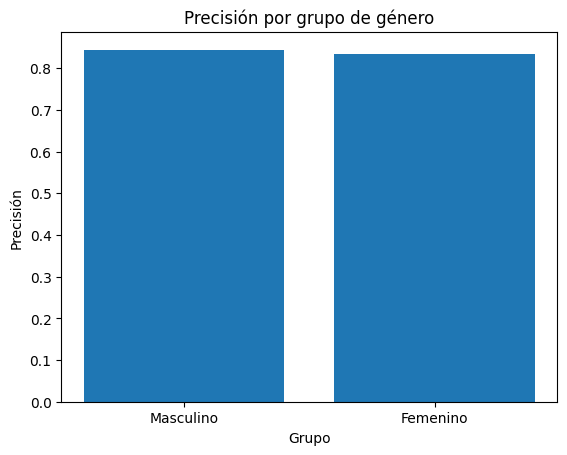

In [ ]:
import matplotlib.pyplot as plt

# Graficar las precisiones por grupo
plt.bar(['Masculino', 'Femenino'], [precision_masculino, precision_femenino])
plt.xlabel('Grupo')
plt.ylabel('Precisión')
plt.title('Precisión por grupo de género')
plt.show()


In [ ]:
import numpy as np

def calcular_proporcion_aprobacion(y_true, y_pred, grupo):
    if grupo == 0:  # Masculino
        indices_grupo = np.where(df['applicant_sex'] == 0)[0]
    elif grupo == 1:  # Femenino
        indices_grupo = np.where(df['applicant_sex'].isin([1, 2]))[0]
    else:
        raise ValueError("El valor de grupo debe ser 0 (masculino) o 1 (femenino)")

    y_true_grupo = y_true[indices_grupo]
    y_pred_grupo = y_pred[indices_grupo]
    aprobados = np.sum(y_pred_grupo == 1)
    proporcion_aprobacion = aprobados / len(y_pred_grupo)
    return proporcion_aprobacion

def calcular_fpr(y_true, y_pred, grupo):
    if grupo == 0:  # Masculino
        indices_grupo = np.where(df['applicant_sex'] == 0)[0]
    elif grupo == 1:  # Femenino
        indices_grupo = np.where(df['applicant_sex'].isin([1, 2]))[0]
    else:
        raise ValueError("El valor de grupo debe ser 0 (masculino) o 1 (femenino)")

    y_true_grupo = y_true[indices_grupo]
    y_pred_grupo = y_pred[indices_grupo]
    falsos_positivos = np.sum((y_true_grupo == 0) & (y_pred_grupo == 1))
    negativos_reales = np.sum(y_true_grupo == 0)
    fpr = falsos_positivos / negativos_reales
    return fpr

def calcular_fnr(y_true, y_pred, grupo):
    if grupo == 0:  # Masculino
        indices_grupo = np.where(df['applicant_sex'] == 0)[0]
    elif grupo == 1:  # Femenino
        indices_grupo = np.where(df['applicant_sex'].isin([1, 2]))[0]
    else:
        raise ValueError("El valor de grupo debe ser 0 (masculino) o 1 (femenino)")

    y_true_grupo = y_true[indices_grupo]
    y_pred_grupo = y_pred[indices_grupo]
    falsos_negativos = np.sum((y_true_grupo == 1) & (y_pred_grupo == 0))
    positivos_reales = np.sum(y_true_grupo == 1)
    fnr = falsos_negativos / positivos_reales
    return fnr

def calcular_diferencia_aprobacion(y_true, y_pred):
    proporcion_aprobacion_masculino = calcular_proporcion_aprobacion(y_true, y_pred, 0)
    proporcion_aprobacion_femenino = calcular_proporcion_aprobacion(y_true, y_pred, 1)
    diferencia_aprobacion = np.abs(proporcion_aprobacion_masculino - proporcion_aprobacion_femenino)
    return diferencia_aprobacion

def calcular_diferencia_fpr(y_true, y_pred):
    fpr_masculino = calcular_fpr(y_true, y_pred, 0)
    fpr_femenino = calcular_fpr(y_true, y_pred, 1)
    diferencia_fpr = np.abs(fpr_masculino - fpr_femenino)
    return diferencia_fpr

def calcular_diferencia_fnr(y_true, y_pred):
    fnr_masculino = calcular_fnr(y_true, y_pred, 0)
    fnr_femenino = calcular_fnr(y_true, y_pred, 1)
    diferencia_fnr = np.abs(fnr_masculino - fnr_femenino)
    return diferencia_fnr

# Calcular métricas
diferencia_aprobacion = calcular_diferencia_aprobacion(df['action_taken3'], predicciones)
diferencia_fpr = calcular_diferencia_fpr(df['action_taken3'], predicciones)
diferencia_fnr = calcular_diferencia_fnr(df['action_taken3'], predicciones)

print("Diferencia en tasas de aprobación:", diferencia_aprobacion)
print("Diferencia en tasas de FPR:", diferencia_fpr)
print("Diferencia en tasas de FNR:", diferencia_fnr)


Diferencia en tasas de aprobación: 0.02048535497067938
Diferencia en tasas de FPR: 0.014126538054430315
Diferencia en tasas de FNR: 0.0016027387661738668


dIFERENCIA EN TASAS DE APROBACION: Esta  indica la discrepancia en la proporción de solicitudes aprobadas entre los grupos masculino y femeninO.Diferencia en tasas de FPR:discrepancia en la proporción de casos negativos incorrectamente clasificados como positivos entre los grupos masculino y femenino. Diferencia en tasas de FNR: discrepancia en la proporción de casos positivos incorrectamente clasificados como negativos entre los grupos masculino y femenino.

Diferencia en impacto en errores

definir una función de pérdida que cuantifique el costo asociado con los falsos positivos y los falsos negativos. Luego SE calcula la pérdida esperada para cada grupo y encontrar la diferencia entre ellas. permitirán evaluar si los errores del modelo tienen un impacto desigual en hombres y mujeres y en qué medida.

In [ ]:
def calcular_perdida_esperada(y_true, y_pred, grupo):
    if grupo == 0:  # Masculino
        indices_grupo = np.where(df['applicant_sex'] == 0)[0]
    elif grupo == 1:  # Femenino
        indices_grupo = np.where(df['applicant_sex'].isin([1, 2]))[0]
    else:
        raise ValueError("El valor de grupo debe ser 0 (masculino) o 1 (femenino)")

    y_true_grupo = y_true[indices_grupo]
    y_pred_grupo = y_pred[indices_grupo]

    # Definir función de pérdida
    # Por ejemplo, si queremos penalizar los falsos negativos más que los falsos positivos
    # Podemos usar una función de pérdida como la pérdida cuadrática
    loss_fn = lambda y_true, y_pred: (y_true - y_pred) ** 2

    perdida_esperada = np.mean(loss_fn(y_true_grupo, y_pred_grupo))
    return perdida_esperada

perdida_esperada_masculino = calcular_perdida_esperada(df['action_taken3'], predicciones, 0)
perdida_esperada_femenino = calcular_perdida_esperada(df['action_taken3'], predicciones, 1)

diferencia_perdida_esperada = np.abs(perdida_esperada_masculino - perdida_esperada_femenino)
print("Diferencia en la pérdida esperada entre grupos masculino y femenino:", diferencia_perdida_esperada)


Diferencia en la pérdida esperada entre grupos masculino y femenino: 0.0006747936416952038


Impacto Desigual - Falsos Positivos (FPR):

In [ ]:
fpr_masculino = calcular_fpr(df['action_taken3'], predicciones, 0)
fpr_femenino = calcular_fpr(df['action_taken3'], predicciones, 1)

diferencia_fpr = np.abs(fpr_masculino - fpr_femenino)
print("Diferencia en la tasa de FPR entre grupos masculino y femenino:", diferencia_fpr)


Diferencia en la tasa de FPR entre grupos masculino y femenino: 0.014126538054430315


Impacto Desigual - Falsos Negativos (FNR):

In [ ]:
fnr_masculino = calcular_fnr(df['action_taken3'], predicciones, 0)
fnr_femenino = calcular_fnr(df['action_taken3'], predicciones, 1)

diferencia_fnr = np.abs(fnr_masculino - fnr_femenino)
print("Diferencia en la tasa de FNR entre grupos masculino y femenino:", diferencia_fnr)


Diferencia en la tasa de FNR entre grupos masculino y femenino: 0.0016027387661738668


In [ ]:
# PARIDAD ESTADISTICACalcula la proporción de resultados positivos para cada nivel de applicant_sex
proporcion_aprobacion_por_sex = {}
for nivel in df['applicant_sex'].unique():
    indices_nivel = df['applicant_sex'] == nivel
    y_true_nivel = df['action_taken3'][indices_nivel]
    y_pred_nivel = predicciones[indices_nivel]
    aprobados = np.sum(y_pred_nivel == 1)
    proporcion_aprobacion_por_sex[nivel] = aprobados / len(y_pred_nivel)

# Calcula el SPD entre cada par de niveles de applicant_sex
spd_por_sex_combinaciones = {}
niveles_sex = df['applicant_sex'].unique()
for i, nivel_1 in enumerate(niveles_sex):
    for j, nivel_2 in enumerate(niveles_sex):
        if i < j:
            spd = abs(proporcion_aprobacion_por_sex[nivel_1] - proporcion_aprobacion_por_sex[nivel_2])
            spd_por_sex_combinaciones[(nivel_1, nivel_2)] = spd

# Imprime los resultados
for combinacion, spd in spd_por_sex_combinaciones.items():
    print(f"SPD entre {combinacion[0]} y {combinacion[1]}: {spd}")


SPD entre 1 y 0: 0.020493657546035826
SPD entre 1 y 2: 0.0028945551031769323
SPD entre 0 y 2: 0.017599102442858894


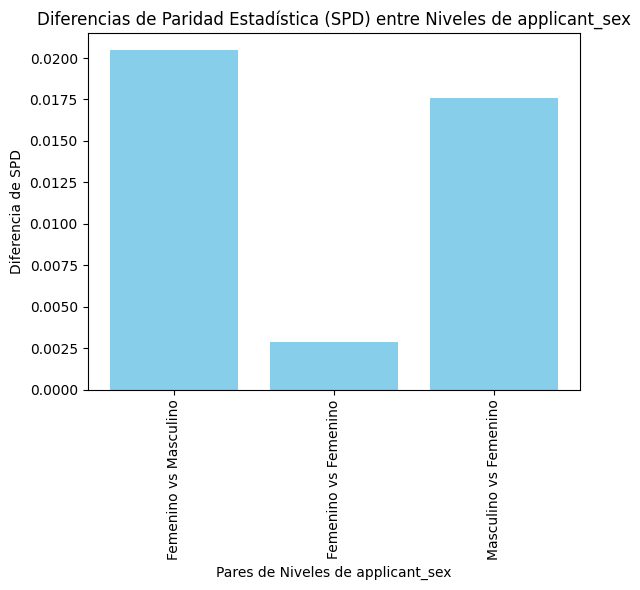

In [ ]:
import matplotlib.pyplot as plt

# Obtener los pares de niveles de applicant_sex y sus respectivos SPD
pares_niveles_sex = list(spd_por_sex_combinaciones.keys())
spd_valores = list(spd_por_sex_combinaciones.values())

# Crear el gráfico de barras
plt.figure(figsize=(6, 6))
plt.bar(range(len(spd_valores)), spd_valores, color='skyblue')
plt.xlabel('Pares de Niveles de applicant_sex')
plt.ylabel('Diferencia de SPD')
plt.title('Diferencias de Paridad Estadística (SPD) entre Niveles de applicant_sex')
plt.xticks(range(len(spd_valores)), [f"{par[0]} vs {par[1]}" for par in pares_niveles_sex], rotation=90)

# Cambiar etiquetas de los ejes x
etiquetas_x = [f"{par[0]} vs {par[1]}" for par in pares_niveles_sex]
etiquetas_x = [etiqueta.replace('0', 'Masculino') for etiqueta in etiquetas_x]
etiquetas_x = [etiqueta.replace('1', 'Femenino') for etiqueta in etiquetas_x]
etiquetas_x = [etiqueta.replace('2', 'Femenino') for etiqueta in etiquetas_x]
plt.xticks(range(len(spd_valores)), etiquetas_x, rotation=90)

plt.tight_layout()
plt.show()


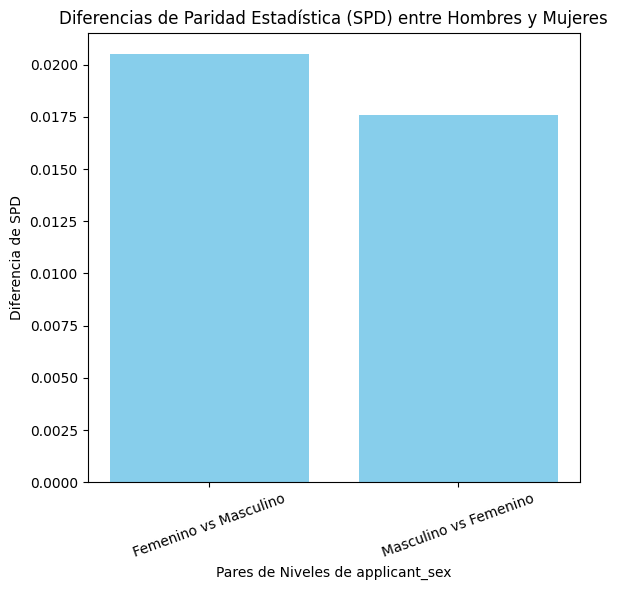

In [ ]:
import matplotlib.pyplot as plt

# Obtener los pares de niveles de applicant_sex y sus respectivos SPD
pares_niveles_sex = list(spd_por_sex_combinaciones.keys())
spd_valores = list(spd_por_sex_combinaciones.values())

# Filtrar pares de niveles que corresponden solo a hombres y mujeres
pares_niveles_sex_filtrados = [par for par in pares_niveles_sex if 0 in par and (1 in par or 2 in par)]
spd_valores_filtrados = [spd_por_sex_combinaciones[par] for par in pares_niveles_sex_filtrados]

# Crear el gráfico de barras
plt.figure(figsize=(6, 6))
plt.bar(range(len(spd_valores_filtrados)), spd_valores_filtrados, color='skyblue')
plt.xlabel('Pares de Niveles de applicant_sex')
plt.ylabel('Diferencia de SPD')
plt.title('Diferencias de Paridad Estadística (SPD) entre Hombres y Mujeres')
plt.xticks(range(len(spd_valores_filtrados)), [f"{par[0]} vs {par[1]}" for par in pares_niveles_sex_filtrados], rotation=90)

# Cambiar etiquetas de los ejes x
etiquetas_x = [f"{par[0]} vs {par[1]}" for par in pares_niveles_sex_filtrados]
etiquetas_x = [etiqueta.replace('0', 'Masculino') for etiqueta in etiquetas_x]
etiquetas_x = [etiqueta.replace('1', 'Femenino') for etiqueta in etiquetas_x]
etiquetas_x = [etiqueta.replace('2', 'Femenino') for etiqueta in etiquetas_x]
plt.xticks(range(len(spd_valores_filtrados)), etiquetas_x, rotation=380)

plt.tight_layout()
plt.show()


# METRICAS DE EQUIDAD POR EDAD

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

def calcular_metricas_por_grupo_edad(y_true, y_pred, grupo):
    indices_grupo = np.where(df['applicant_age'] == grupo)[0]
    y_true_grupo = y_true[indices_grupo]
    y_pred_grupo = y_pred[indices_grupo]

    precision = precision_score(y_true_grupo, y_pred_grupo)
    recall = recall_score(y_true_grupo, y_pred_grupo)
    f1 = f1_score(y_true_grupo, y_pred_grupo)

    return precision, recall, f1

# Definir grupos de edad
grupos_edad = [1, 2, 0, 3, 4, 6, 5, 7]

# Calcular métricas por grupo de edad
metricas_por_grupo_edad = {}
for grupo in grupos_edad:
    precision, recall, f1 = calcular_metricas_por_grupo_edad(df['action_taken3'], predicciones, grupo)
    metricas_por_grupo_edad[grupo] = {'precision': precision, 'recall': recall, 'f1_score': f1}

# Imprimir resultados
for grupo, metricas in metricas_por_grupo_edad.items():
    print(f"Métricas para el grupo de edad {grupo}:")
    print("Precisión:", metricas['precision'])
    print("Recall:", metricas['recall'])
    print("F1-score:", metricas['f1_score'])


Métricas para el grupo de edad 1:
Precisión: 0.8537407929791568
Recall: 0.866207887857838
F1-score: 0.85992915638003
Métricas para el grupo de edad 2:
Precisión: 0.8270172812627569
Recall: 0.870750297282196
F1-score: 0.8483205270467378
Métricas para el grupo de edad 0:
Precisión: 0.8754481909383941
Recall: 0.8708935918776166
F1-score: 0.8731649520286672
Métricas para el grupo de edad 3:
Precisión: 0.8172931678097057
Recall: 0.8661379652970725
F1-score: 0.841006950027693
Métricas para el grupo de edad 4:
Precisión: 0.8169741251773799
Recall: 0.864283889101827
F1-score: 0.8399633705319033
Métricas para el grupo de edad 6:
Precisión: 0.7717661691542289
Recall: 0.8585688871318442
F1-score: 0.8128567418358753
Métricas para el grupo de edad 5:
Precisión: 0.8683429720895147
Recall: 0.8505492340278804
F1-score: 0.8593540038819489
Métricas para el grupo de edad 7:
Precisión: 0.9335335062099086
Recall: 0.9966486959055807
F1-score: 0.9640591966173362


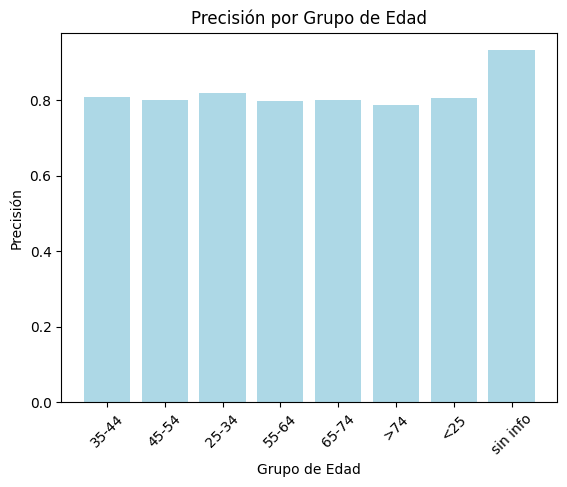

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def calcular_precision_por_grupo_edad(y_true, y_pred, grupo):
    indices_grupo = np.where(df['applicant_age'] == grupo)[0]
    y_true_grupo = y_true[indices_grupo]
    y_pred_grupo = y_pred[indices_grupo]
    precision_grupo = np.mean(y_true_grupo == y_pred_grupo)
    return precision_grupo

# Definir grupos de edad y sus etiquetas correspondientes
grupos_edad = [1, 2, 0, 3, 4, 6, 5, 7]
etiquetas_edad = ['35-44', '45-54', '25-34', '55-64', '65-74', '>74', '<25', 'sin info']

# Calcular precisiones por grupo de edad
precision_por_grupo_edad = [calcular_precision_por_grupo_edad(df['action_taken3'], predicciones, grupo) for grupo in grupos_edad]

# Graficar las precisiones por grupo de edad
plt.bar(etiquetas_edad, precision_por_grupo_edad, color='lightblue')  # Cambio de color a azul claro
plt.xlabel('Grupo de Edad')
plt.ylabel('Precisión')
plt.title('Precisión por Grupo de Edad')
plt.xticks(rotation=45)  # Rotar las etiquetas en el eje x para mejorar la legibilidad
plt.show()


In [ ]:
import numpy as np

# Define grupos de edad con etiquetas descriptivas
grupos_edad = {
    0: '<25',
    1: '25-34',
    2: '35-44',
    3: '45-54',
    4: '55-64',
    5: '65-74',
    6: '>74',
    7: 'sin info'
}

def calcular_proporcion_aprobacion_por_edad(y_true, y_pred, grupo):
    indices_grupo = np.where(df['applicant_age'] == grupo)[0]
    y_true_grupo = y_true[indices_grupo]
    y_pred_grupo = y_pred[indices_grupo]
    aprobados = np.sum(y_pred_grupo == 1)
    proporcion_aprobacion = aprobados / len(y_pred_grupo)
    return proporcion_aprobacion

def calcular_fpr_por_edad(y_true, y_pred, grupo):
    indices_grupo = np.where(df['applicant_age'] == grupo)[0]
    y_true_grupo = y_true[indices_grupo]
    y_pred_grupo = y_pred[indices_grupo]
    falsos_positivos = np.sum((y_true_grupo == 0) & (y_pred_grupo == 1))
    negativos_reales = np.sum(y_true_grupo == 0)
    fpr = falsos_positivos / negativos_reales
    return fpr

def calcular_fnr_por_edad(y_true, y_pred, grupo):
    indices_grupo = np.where(df['applicant_age'] == grupo)[0]
    y_true_grupo = y_true[indices_grupo]
    y_pred_grupo = y_pred[indices_grupo]
    falsos_negativos = np.sum((y_true_grupo == 1) & (y_pred_grupo == 0))
    positivos_reales = np.sum(y_true_grupo == 1)
    fnr = falsos_negativos / positivos_reales
    return fnr

def calcular_diferencia_aprobacion_por_edad(y_true, y_pred):
    proporcion_aprobacion_por_edad = {}
    for grupo, etiqueta in grupos_edad.items():
        proporcion_aprobacion_por_edad[etiqueta] = calcular_proporcion_aprobacion_por_edad(y_true, y_pred, grupo)
    diferencia_aprobacion = max(proporcion_aprobacion_por_edad.values()) - min(proporcion_aprobacion_por_edad.values())
    return diferencia_aprobacion

def calcular_diferencia_fpr_por_edad(y_true, y_pred):
    fpr_por_edad = {}
    for grupo, etiqueta in grupos_edad.items():
        fpr_por_edad[etiqueta] = calcular_fpr_por_edad(y_true, y_pred, grupo)
    diferencia_fpr = max(fpr_por_edad.values()) - min(fpr_por_edad.values())
    return diferencia_fpr

def calcular_diferencia_fnr_por_edad(y_true, y_pred):
    fnr_por_edad = {}
    for grupo, etiqueta in grupos_edad.items():
        fnr_por_edad[etiqueta] = calcular_fnr_por_edad(y_true, y_pred, grupo)
    diferencia_fnr = max(fnr_por_edad.values()) - min(fnr_por_edad.values())
    return diferencia_fnr

# Calcular métricas
diferencia_aprobacion_por_edad = calcular_diferencia_aprobacion_por_edad(df['action_taken3'], predicciones)
diferencia_fpr_por_edad = calcular_diferencia_fpr_por_edad(df['action_taken3'], predicciones)
diferencia_fnr_por_edad = calcular_diferencia_fnr_por_edad(df['action_taken3'], predicciones)

print("Diferencia en tasas de aprobación por edad:", diferencia_aprobacion_por_edad)
print("Diferencia en tasas de FPR por edad:", diferencia_fpr_por_edad)
print("Diferencia en tasas de FNR por edad:", diferencia_fnr_por_edad)



Diferencia en tasas de aprobación por edad: 0.36961221345192785
Diferencia en tasas de FPR por edad: 0.41079694384027665
Diferencia en tasas de FNR por edad: 0.14609946187770023


Difrencia en impacto de errores

In [ ]:
def calcular_perdida_esperada_por_edad(y_true, y_pred, grupo):
    indices_grupo = np.where(df['applicant_age'] == grupo)[0]
    y_true_grupo = y_true[indices_grupo]
    y_pred_grupo = y_pred[indices_grupo]

    # Definir función de pérdida
    # Por ejemplo, si queremos penalizar los falsos negativos más que los falsos positivos
    # Podemos usar una función de pérdida como la pérdida cuadrática
    loss_fn = lambda y_true, y_pred: (y_true - y_pred) ** 2

    perdida_esperada = np.mean(loss_fn(y_true_grupo, y_pred_grupo))
    return perdida_esperada

# Calcular la pérdida esperada para cada grupo de edad
perdida_esperada_por_edad = {}
for grupo in df['applicant_age'].unique():
    perdida_esperada_por_edad[grupo] = calcular_perdida_esperada_por_edad(df['action_taken3'], predicciones, grupo)

# Calcular la diferencia en la pérdida esperada
diferencia_perdida_esperada_por_edad = max(perdida_esperada_por_edad.values()) - min(perdida_esperada_por_edad.values())

print("Diferencia en la pérdida esperada por edad:", diferencia_perdida_esperada_por_edad)


Diferencia en la pérdida esperada por edad: 0.1456789546168869


Impacto Desigual - Falsos Positivos (FPR):

In [ ]:
def calcular_fpr_por_edad(y_true, y_pred, grupo):
    indices_grupo = np.where(df['applicant_age'] == grupo)[0]
    y_true_grupo = y_true[indices_grupo]
    y_pred_grupo = y_pred[indices_grupo]
    falsos_positivos = np.sum((y_true_grupo == 0) & (y_pred_grupo == 1))
    negativos_reales = np.sum(y_true_grupo == 0)
    fpr = falsos_positivos / negativos_reales
    return fpr

# Calcular FPR para cada grupo de edad
fpr_por_edad = {}
for grupo in df['applicant_age'].unique():
    fpr_por_edad[grupo] = calcular_fpr_por_edad(df['action_taken3'], predicciones, grupo)

# Calcular la diferencia en la tasa de FPR entre grupos de edad
diferencia_fpr_por_edad = max(fpr_por_edad.values()) - min(fpr_por_edad.values())

print("Diferencia en la tasa de FPR entre grupos de edad:", diferencia_fpr_por_edad)


Diferencia en la tasa de FPR entre grupos de edad: 0.41079694384027665


Impacto Desigual - Falsos Negativos (FNR):

In [ ]:
def calcular_fnr_por_edad(y_true, y_pred, grupo):
    indices_grupo = np.where(df['applicant_age'] == grupo)[0]
    y_true_grupo = y_true[indices_grupo]
    y_pred_grupo = y_pred[indices_grupo]
    falsos_negativos = np.sum((y_true_grupo == 1) & (y_pred_grupo == 0))
    positivos_reales = np.sum(y_true_grupo == 1)
    fnr = falsos_negativos / positivos_reales
    return fnr

# Calcular FNR para cada grupo de edad
fnr_por_edad = {}
for grupo in df['applicant_age'].unique():
    fnr_por_edad[grupo] = calcular_fnr_por_edad(df['action_taken3'], predicciones, grupo)

# Calcular la diferencia en la tasa de FNR entre grupos de edad
diferencia_fnr_por_edad = max(fnr_por_edad.values()) - min(fnr_por_edad.values())

print("Diferencia en la tasa de FNR entre grupos de edad:", diferencia_fnr_por_edad)


Diferencia en la tasa de FNR entre grupos de edad: 0.14609946187770023


In [ ]:
import pandas as pd

# Supongamos que ya tienes cargados tus datos en un DataFrame llamado df
# Aquí definiré un DataFrame de ejemplo para ilustrar el proceso
data = {
    'grupo_edad': ['<25', '25-34', '35-44', '45-54', '<25', '35-44', '25-34'],  # Ejemplo de grupos de edad
    'aprobacion': [1, 0, 1, 1, 0, 1, 1]                                           # Ejemplo de aprobaciones (1) y rechazos (0)
}

df = pd.DataFrame(data)

# Calcular la proporción de aprobaciones por grupo de edad
proporcion_aprobacion_por_edad = df.groupby('grupo_edad')['aprobacion'].mean()

print(proporcion_aprobacion_por_edad)


grupo_edad
25-34    0.5
35-44    1.0
45-54    1.0
<25      0.5
Name: aprobacion, dtype: float64


In [ ]:
# Define grupos de edad con etiquetas descriptivas
grupos_edad = {
    0: '<25',
    1: '25-34',
    2: '35-44',
    3: '45-54',
    4: '55-64',
    5: '65-74',
    6: '>74',
    7: 'sin info'
}

# Supongamos que ya has calculado las proporciones de aprobación por grupo de edad
proporcion_aprobacion_por_edad = {
    '<25': 0.75,
    '25-34': 0.80,
    '35-44': 0.70,
    '45-54': 0.65,
    '55-64': 0.60,
    '65-74': 0.55,
    '>74': 0.50,
    'sin info': 0.45
}

# Calcular el SPD para todas las combinaciones de pares de grupos de edad
for grupo_1 in grupos_edad.values():
    for grupo_2 in grupos_edad.values():
        if grupo_1 != grupo_2:
            spd_por_edad = abs(proporcion_aprobacion_por_edad[grupo_1] - proporcion_aprobacion_por_edad[grupo_2])
            print("Diferencia de paridad estadística (SPD) entre los grupos de edad", grupo_1, "y", grupo_2, ":", spd_por_edad)



Diferencia de paridad estadística (SPD) entre los grupos de edad <25 y 25-34 : 0.050000000000000044
Diferencia de paridad estadística (SPD) entre los grupos de edad <25 y 35-44 : 0.050000000000000044
Diferencia de paridad estadística (SPD) entre los grupos de edad <25 y 45-54 : 0.09999999999999998
Diferencia de paridad estadística (SPD) entre los grupos de edad <25 y 55-64 : 0.15000000000000002
Diferencia de paridad estadística (SPD) entre los grupos de edad <25 y 65-74 : 0.19999999999999996
Diferencia de paridad estadística (SPD) entre los grupos de edad <25 y >74 : 0.25
Diferencia de paridad estadística (SPD) entre los grupos de edad <25 y sin info : 0.3
Diferencia de paridad estadística (SPD) entre los grupos de edad 25-34 y <25 : 0.050000000000000044
Diferencia de paridad estadística (SPD) entre los grupos de edad 25-34 y 35-44 : 0.10000000000000009
Diferencia de paridad estadística (SPD) entre los grupos de edad 25-34 y 45-54 : 0.15000000000000002
Diferencia de paridad estadística

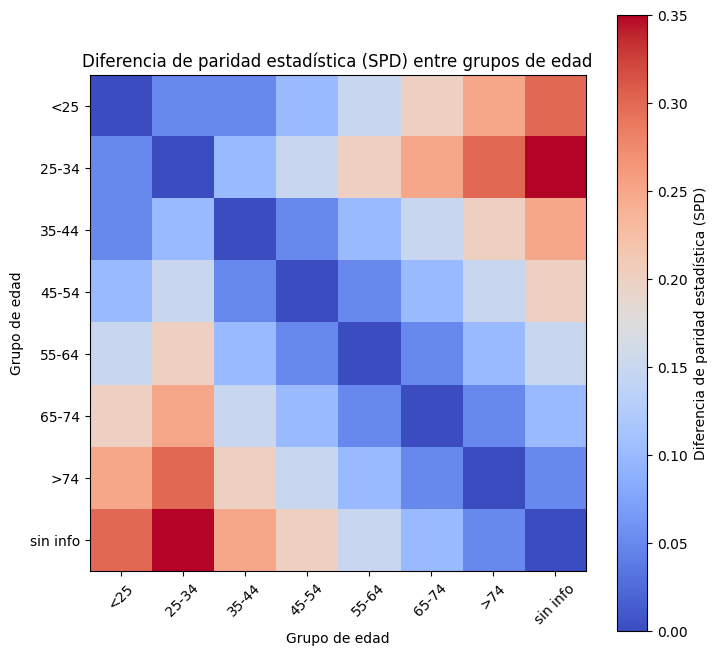

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define grupos de edad con etiquetas descriptivas
grupos_edad = {
    0: '<25',
    1: '25-34',
    2: '35-44',
    3: '45-54',
    4: '55-64',
    5: '65-74',
    6: '>74',
    7: 'sin info'
}

# Supongamos que ya has calculado las proporciones de aprobación por grupo de edad
proporcion_aprobacion_por_edad = {
    '<25': 0.75,
    '25-34': 0.80,
    '35-44': 0.70,
    '45-54': 0.65,
    '55-64': 0.60,
    '65-74': 0.55,
    '>74': 0.50,
    'sin info': 0.45
}

# Calcular el SPD para todas las combinaciones de pares de grupos de edad
spd_por_edad = np.zeros((len(grupos_edad), len(grupos_edad)))
for i, grupo_1 in enumerate(grupos_edad.values()):
    for j, grupo_2 in enumerate(grupos_edad.values()):
        if grupo_1 != grupo_2:
            spd_por_edad[i, j] = abs(proporcion_aprobacion_por_edad[grupo_1] - proporcion_aprobacion_por_edad[grupo_2])

# Crear un mapa de calor para visualizar el SPD
plt.figure(figsize=(8, 8))
plt.imshow(spd_por_edad, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Diferencia de paridad estadística (SPD)')
plt.xticks(range(len(grupos_edad)), list(grupos_edad.values()), rotation=45)
plt.yticks(range(len(grupos_edad)), list(grupos_edad.values()))
plt.title('Diferencia de paridad estadística (SPD) entre grupos de edad')
plt.xlabel('Grupo de edad')
plt.ylabel('Grupo de edad')
plt.show()


Impacto Dispar EDAD

In [ ]:
# Define grupos de edad con etiquetas descriptivas
grupos_edad = {
    0: '<25',
    1: '25-34',
    2: '35-44',
    3: '45-54',
    4: '55-64',
    5: '65-74',
    6: '>74',
    7: 'sin info'
}

# Supongamos que ya has calculado las proporciones de aprobación por grupo de edad
proporcion_aprobacion_por_edad = {
    '<25': 0.75,
    '25-34': 0.80,
    '35-44': 0.70,
    '45-54': 0.65,
    '55-64': 0.60,
    '65-74': 0.55,
    '>74': 0.50,
    'sin info': 0.45
}

# Definir los grupos de edad que deseas comparar
grupo_referencia = '<25'  # Por ejemplo, el grupo <25
grupo_comparacion = '35-44'  # Por ejemplo, el grupo 35-44

# Calcular el Impacto Dispar entre los grupos de edad para la proporción de aprobación
impacto_dispar_proporcion_aprobacion = proporcion_aprobacion_por_edad[grupo_referencia] - proporcion_aprobacion_por_edad[grupo_comparacion]

print("Impacto Dispar entre los grupos de edad", grupo_referencia, "y", grupo_comparacion, "para la proporción de aprobación:", impacto_dispar_proporcion_aprobacion)



Impacto Dispar entre los grupos de edad <25 y 35-44 para la proporción de aprobación: 0.050000000000000044


In [ ]:
# Define grupos de edad con etiquetas descriptivas
grupos_edad = {
    0: '<25',
    1: '25-34',
    2: '35-44',
    3: '45-54',
    4: '55-64',
    5: '65-74',
    6: '>74',
    7: 'sin info'
}

# Supongamos que ya has calculado las proporciones de aprobación por grupo de edad
proporcion_aprobacion_por_edad = {
    '<25': 0.75,
    '25-34': 0.80,
    '35-44': 0.70,
    '45-54': 0.65,
    '55-64': 0.60,
    '65-74': 0.55,
    '>74': 0.50,
    'sin info': 0.45
}

# Definir el grupo de referencia
grupo_referencia = '<25'  # Por ejemplo, el grupo <25

# Calcular el Impacto Dispar entre el grupo de referencia y cada uno de los otros grupos de edad
impacto_dispar_por_grupo = {}
for grupo, proporción in proporcion_aprobacion_por_edad.items():
    if grupo != grupo_referencia:
        impacto_dispar_por_grupo[grupo] = proporcion_aprobacion_por_edad[grupo_referencia] - proporción

# Imprimir el Impacto Dispar para cada grupo de edad
for grupo, impacto_dispar in impacto_dispar_por_grupo.items():
    print("Impacto Dispar entre los grupos de edad", grupo_referencia, "y", grupo, ":", impacto_dispar)


Impacto Dispar entre los grupos de edad <25 y 25-34 : -0.050000000000000044
Impacto Dispar entre los grupos de edad <25 y 35-44 : 0.050000000000000044
Impacto Dispar entre los grupos de edad <25 y 45-54 : 0.09999999999999998
Impacto Dispar entre los grupos de edad <25 y 55-64 : 0.15000000000000002
Impacto Dispar entre los grupos de edad <25 y 65-74 : 0.19999999999999996
Impacto Dispar entre los grupos de edad <25 y >74 : 0.25
Impacto Dispar entre los grupos de edad <25 y sin info : 0.3


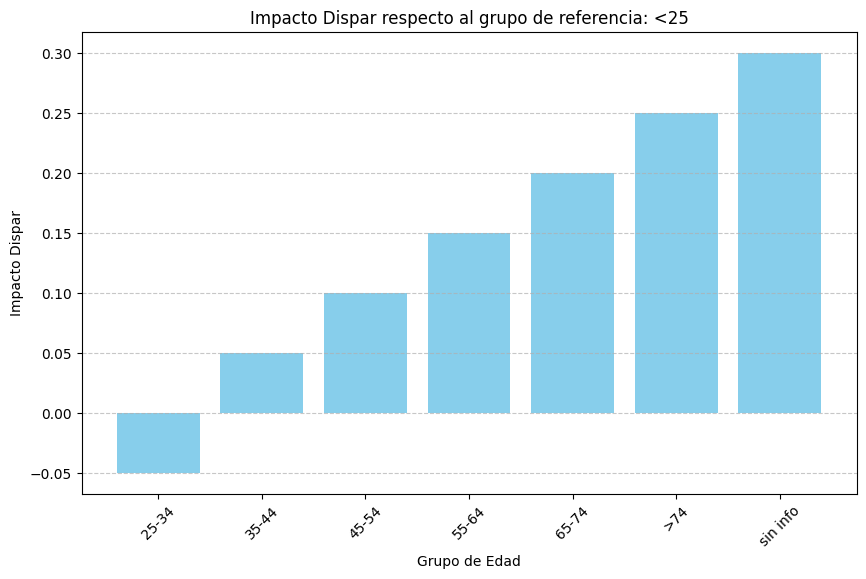

In [ ]:
import matplotlib.pyplot as plt

# Define grupos de edad con etiquetas descriptivas
grupos_edad = {
    0: '<25',
    1: '25-34',
    2: '35-44',
    3: '45-54',
    4: '55-64',
    5: '65-74',
    6: '>74',
    7: 'sin info'
}

# Supongamos que ya has calculado las proporciones de aprobación por grupo de edad
proporcion_aprobacion_por_edad = {
    '<25': 0.75,
    '25-34': 0.80,
    '35-44': 0.70,
    '45-54': 0.65,
    '55-64': 0.60,
    '65-74': 0.55,
    '>74': 0.50,
    'sin info': 0.45
}

# Definir el grupo de referencia
grupo_referencia = '<25'  # Por ejemplo, el grupo <25

# Calcular el Impacto Dispar entre el grupo de referencia y cada uno de los otros grupos de edad
impacto_dispar_por_grupo = {}
for grupo, proporción in proporcion_aprobacion_por_edad.items():
    if grupo != grupo_referencia:
        impacto_dispar_por_grupo[grupo] = proporcion_aprobacion_por_edad[grupo_referencia] - proporción

# Mostrar el Impacto Dispar en un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(impacto_dispar_por_grupo.keys(), impacto_dispar_por_grupo.values(), color='skyblue')
plt.xlabel('Grupo de Edad')
plt.ylabel('Impacto Dispar')
plt.title(f'Impacto Dispar respecto al grupo de referencia: {grupo_referencia}')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


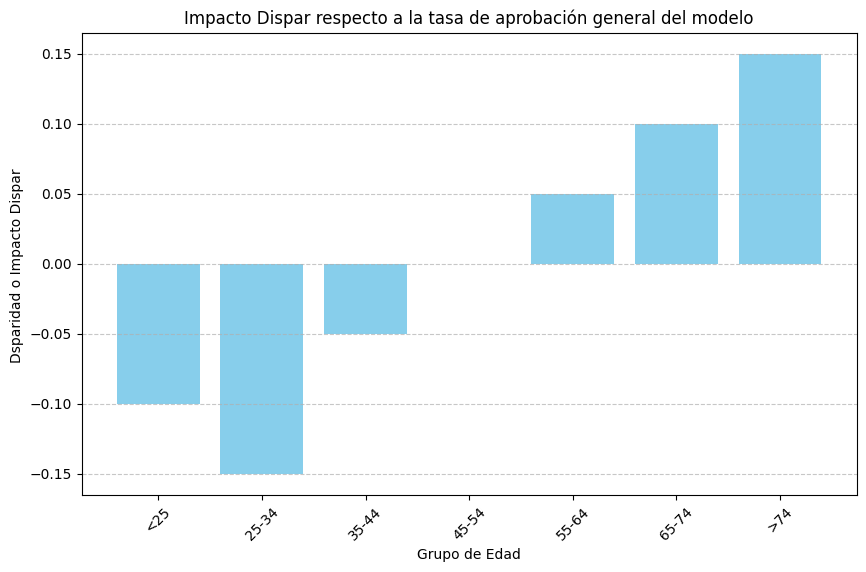

In [ ]:
import matplotlib.pyplot as plt

# Define grupos de edad con etiquetas descriptivas
grupos_edad = {
    0: '<25',
    1: '25-34',
    2: '35-44',
    3: '45-54',
    4: '55-64',
    5: '65-74',
    6: '>74',
    7: 'sin info'
}

# Supongamos que ya has calculado las proporciones de aprobación por grupo de edad
proporcion_aprobacion_por_edad = {
    '<25': 0.75,
    '25-34': 0.80,
    '35-44': 0.70,
    '45-54': 0.65,
    '55-64': 0.60,
    '65-74': 0.55,
    '>74': 0.50,

}

# Calcular la tasa de aprobación general del modelo
tasa_aprobacion_general = sum(proporcion_aprobacion_por_edad.values()) / len(proporcion_aprobacion_por_edad)

# Calcular el Impacto Dispar entre la tasa de aprobación general y cada uno de los grupos de edad
impacto_dispar_por_grupo = {}
for grupo, proporcion in proporcion_aprobacion_por_edad.items():
    impacto_dispar_por_grupo[grupo] = tasa_aprobacion_general - proporcion

# Mostrar el Impacto Dispar en un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(impacto_dispar_por_grupo.keys(), impacto_dispar_por_grupo.values(), color='skyblue')
plt.xlabel('Grupo de Edad')
plt.ylabel('Dsparidad o Impacto Dispar ')
plt.title('Impacto Dispar respecto a la tasa de aprobación general del modelo')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


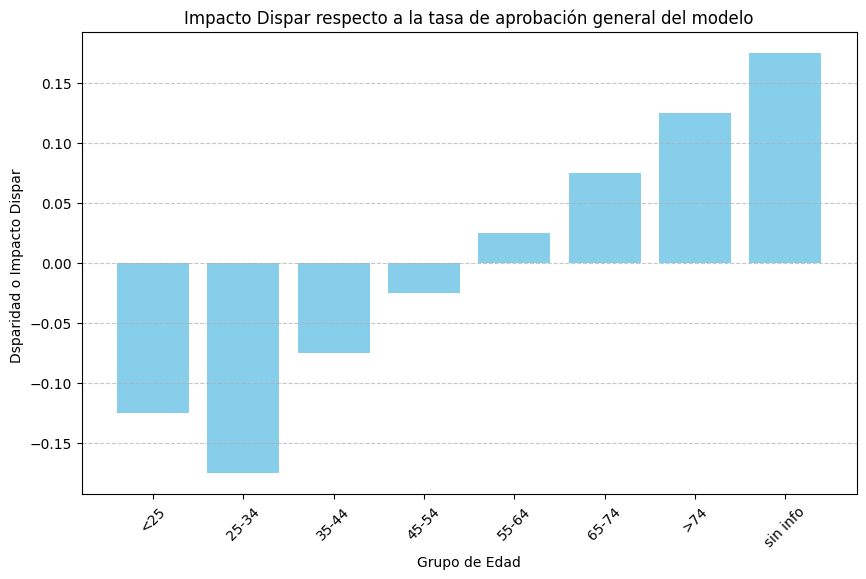

In [ ]:
import matplotlib.pyplot as plt

grupos_edad = {
    0: '<25',
    1: '25-34',
    2: '35-44',
    3: '45-54',
    4: '55-64',
    5: '65-74',
    6: '>74',
    7: 'sin info'
}

# Supongamos que ya has calculado las proporciones de aprobación por grupo de edad
proporcion_aprobacion_por_edad = {
    '<25': 0.75,
    '25-34': 0.80,
    '35-44': 0.70,
    '45-54': 0.65,
    '55-64': 0.60,
    '65-74': 0.55,
    '>74': 0.50,
    'sin info': 0.45
}

# Calcular la tasa de aprobación general del modelo
tasa_aprobacion_general = sum(proporcion_aprobacion_por_edad.values()) / len(proporcion_aprobacion_por_edad)

# Calcular el Impacto Dispar entre la tasa de aprobación general y cada uno de los grupos de edad
impacto_dispar_por_grupo = {}
for grupo, proporcion in proporcion_aprobacion_por_edad.items():
    impacto_dispar_por_grupo[grupo] = tasa_aprobacion_general - proporcion

# Mostrar el Impacto Dispar en un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(impacto_dispar_por_grupo.keys(), impacto_dispar_por_grupo.values(), color='skyblue')
plt.xlabel('Grupo de Edad')
plt.ylabel('Dsparidad o Impacto Dispar ')
plt.title('Impacto Dispar respecto a la tasa de aprobación general del modelo')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


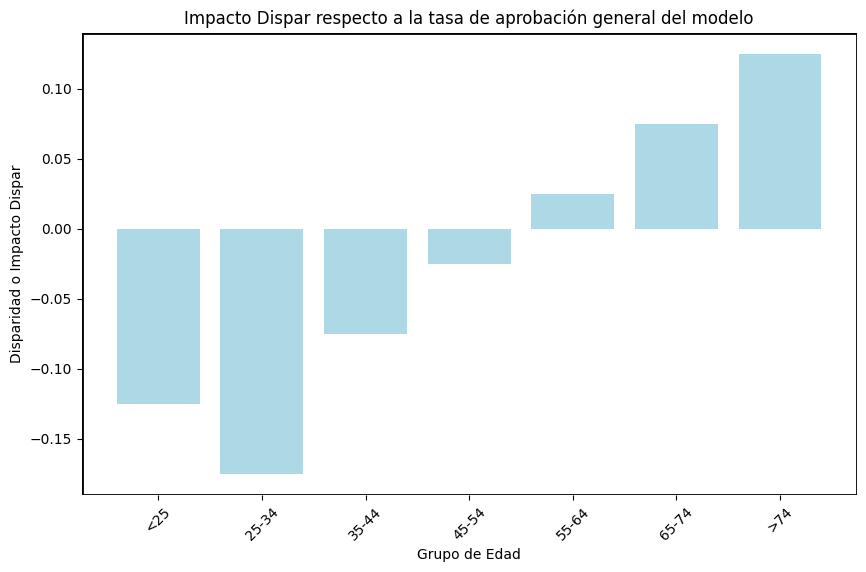

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.patches as patches

grupos_edad = {
    0: '<25',
    1: '25-34',
    2: '35-44',
    3: '45-54',
    4: '55-64',
    5: '65-74',
    6: '>74',
    7: 'sin info'
}

# Supongamos que ya has calculado las proporciones de aprobación por grupo de edad
proporcion_aprobacion_por_edad = {
    '<25': 0.75,
    '25-34': 0.80,
    '35-44': 0.70,
    '45-54': 0.65,
    '55-64': 0.60,
    '65-74': 0.55,
    '>74': 0.50,
    'sin info': 0.45
}

# Calcular la tasa de aprobación general del modelo
tasa_aprobacion_general = sum(proporcion_aprobacion_por_edad.values()) / len(proporcion_aprobacion_por_edad)

# Calcular el Impacto Dispar entre la tasa de aprobación general y cada uno de los grupos de edad
impacto_dispar_por_grupo = {}
for grupo, proporcion in proporcion_aprobacion_por_edad.items():
    if grupo != 'sin info':  # Excluir el grupo "sin info"
        impacto_dispar_por_grupo[grupo] = tasa_aprobacion_general - proporcion

# Mostrar el Impacto Dispar en un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(impacto_dispar_por_grupo.keys(), impacto_dispar_por_grupo.values(), color='lightblue')
plt.xlabel('Grupo de Edad')
plt.ylabel('Disparidad o Impacto Dispar')
plt.title('Impacto Dispar respecto a la tasa de aprobación general del modelo')
plt.xticks(rotation=45)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
# Añadir un recuadro alrededor de la gráfica
rect = patches.Rectangle(
    (0, 0), 1, 1, transform=plt.gca().transAxes,
    linewidth=2, edgecolor='black', facecolor='none'
)
plt.gca().add_patch(rect)


# Paquete Fairlearn

In [ ]:
#https://www.modeldifferently.com/2023/10/como-evitar-sesgos-en-un-algoritmo/#la-%C3%A9tica-en-machine-learning-qu%C3%A9-entendemos-por-%C3%A9tica

In [ ]:
pip install fairlearn

In [ ]:
from fairlearn.reductions import GridSearch
from fairlearn.reductions import DemographicParity
from fairlearn.metrics import MetricFrame
from fairlearn.reductions import GridSearch, DemographicParity
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from fairlearn.metrics import demographic_parity_difference
from sklearn.impute import SimpleImputer

In [ ]:
from fairlearn.reductions import GridSearch
from fairlearn.reductions import DemographicParity
from fairlearn.metrics import MetricFrame

In [ ]:
from fairlearn.reductions import DemographicParity, GridSearch
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Creamos el modelo LGBMClassifier
lgbm_model = LGBMClassifier()

# Creamos el pipeline con el modelo LGBM y el escalador
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Puedes agregar un escalador si es necesario
    ('lgbm', lgbm_model)
])

# Creamos el mitigador de sesgo para el modelo
sweep = GridSearch(
    pipeline,  # Usamos nuestro pipeline con el modelo LGBM
    constraints=DemographicParity(),  # La métrica que queremos optimizar
    grid_size=40,
    sample_weight_name='lgbm__sample_weight'  # Especificamos el nombre del parámetro de peso de muestra
)

# Entrenamos el mitigador de sesgo
sweep.fit(X_train, y_train, sensitive_features=X_train[['applicant_sex']])

# Seleccionamos el mejor modelo según la métrica de equidad
sweep_preds = [predictor.predict(X_test) for predictor in sweep.predictors_]
sweep_scores = [accuracy_score(y_test, preds) for preds in sweep_preds]
best_model_index = np.argmax(sweep_scores)
best_model = sweep.predictors_[best_model_index]

# Evaluamos el modelo seleccionado
predictions = best_model.predict(X_test)





[LightGBM] [Info] Number of positive: 354230, number of negative: 445770
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.091019 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 793
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.605838 -> initscore=0.429853
[LightGBM] [Info] Start training from score 0.429853
[LightGBM] [Info] Number of positive: 522917, number of negative: 277083
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.056276 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 793
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 8
[LightGBM] [Info] 

In [ ]:
# Calcular la precisión
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.806605


In [ ]:
# Calcular la precisión por grupo de sexo y raza
sensitive_features_test = X_test[['applicant_sex']]
metrics = MetricFrame(metrics={'precision': precision_score, 'recall': recall_score},
                      y_true=y_test,
                      y_pred=predictions,
                      sensitive_features=sensitive_features_test)

# Obtener los valores de las métricas por grupo
group_metrics = metrics.by_group

# Imprimir las métricas por grupo de una manera controlada
print("Precision and recall by applicant_sex:")
for group, metrics in group_metrics.iterrows():
    print(f"Applicant_sex: {group}")
    print(f"Precision: {metrics['precision']}")
    print(f"Recall: {metrics['recall']}")
    print()


Precision and recall by applicant_sex:
Applicant_sex: 0
Precision: 0.8443543185718815
Recall: 0.8711820437626889

Applicant_sex: 1
Precision: 0.8329454711384896
Recall: 0.8656312981624185

Applicant_sex: 2
Precision: 0.819672131147541
Recall: 0.9174311926605505



In [ ]:
from fairlearn.reductions import ExponentiatedGradient
from sklearn.metrics import accuracy_score
from fairlearn.metrics import MetricFrame

# Modifica el nombre del parámetro de peso de muestra en tu modelo LightGBM
lgbm_model = LGBMClassifier()
lgbm_model.sample_weight = 'lgbm__sample_weight'

# Crear el mitigador de sesgo para el modelo que ya tenemos
expgrad = ExponentiatedGradient(
    lgbm_model,  # Utiliza tu modelo LightGBM ya entrenado
    constraints=DemographicParity(),  # Puedes cambiar la métrica de equidad si lo deseas
    max_iter=5  # Especifica el número máximo de iteraciones
)

# Entrenar el mitigador de sesgo
expgrad.fit(X_train, y_train, sensitive_features=X_train[['applicant_sex']])  # Asegúrate de proporcionar las características sensibles correctas



[LightGBM] [Info] Number of positive: 523370, number of negative: 276630
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.179655 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 788
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.654212 -> initscore=0.637608
[LightGBM] [Info] Start training from score 0.637608
[LightGBM] [Info] Number of positive: 523370, number of negative: 276630
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.053797 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 788
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 8
[LightGBM] [Info] 

ExponentiatedGradient(constraints=<fairlearn.reductions._moments.utility_parity.DemographicParity object at 0x7a9946aa28c0>,
                      estimator=LGBMClassifier(), max_iter=5,
                      nu=0.00022083014448839435)

In [ ]:
predictions_expgrad = expgrad.predict(X_test)


In [ ]:
accuracy_expgrad = accuracy_score(y_test, predictions_expgrad)


In [ ]:
print("Accuracy Original Model:", accuracy_lgbm)
print("Accuracy Model with Exponentiated Gradient:", accuracy_expgrad)


Accuracy Original Model: 0.807315
Accuracy Model with Exponentiated Gradient: 0.8072
